In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [34]:
#header

headers = [
    "設定額 Sales (A)",
    "解約額 Repurchases (B)",
    "償還額 Redemptions (C)",
    "資金増減額 Amount of Assets Flows (D) = (A) - ((B) + (C))",
    "収益分配額 Profit Distributions (E)",
    "運用増減額 Amount of Management Results (F)",
    "純資産増減額 Compared with Previous Term ((D) - (E) + (F))",
    "純資産総額 Total Net Assets"
]

# 英語、日本語、記号に分ける
japanese = []
english = []
symbols = []

for header in headers:
    # ( で区切る
    parts = header.split('(')
    
    # 日本語と英語部分を抽出
    japanese_english = parts[0].strip()
    japanese_part = japanese_english.split(' ')[0]
    english_part = ' '.join(japanese_english.split(' ')[1:])
    
    # 記号部分を抽出
    symbol_part = '(' + parts[1] if len(parts) > 1 else ''
    
    japanese.append(japanese_part)
    english.append(english_part)
    symbols.append(symbol_part)

# 結果を表示
print("日本語:", japanese)
print("英語:", english)
print("記号:", symbols)

columns = ['投資信託会社', 'english name']

for elem in english :
    columns.append(elem)

日本語: ['設定額', '解約額', '償還額', '資金増減額', '収益分配額', '運用増減額', '純資産増減額', '純資産総額']
英語: ['Sales', 'Repurchases', 'Redemptions', 'Amount of Assets Flows', 'Profit Distributions', 'Amount of Management Results', 'Compared with Previous Term', 'Total Net Assets']
記号: ['(A)', '(B)', '(C)', '(D) = ', '(E)', '(F)', '(', '']


In [35]:
# sheet

# Excelファイルのパス
file_path = '/home/sclyde/home/finance/data/the_investment_trusts_associaton/I01114_pri.xlsx'
# Excelファイルを読み込む
xls = pd.ExcelFile(file_path)
# 全シート名を取得
sheet_names = xls.sheet_names
# シート名を表示
for sheet_name in sheet_names:
    print(sheet_name)

translation_dict = {
    '総合計': 'Total',
    '株式投信': 'Stock Investment',
    '公社債投信': 'Bond Investment',
    '長期公社債投信': 'Long-term Bond Investment',
    'MRF': 'MRF',  # MRFはそのまま
    'その他': 'Other'
}

総合計
株式投信
公社債投信


In [36]:
target_dir = './private'
# 親フォルダが存在しない場合のみ作成
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    print(f"ターゲットを作成しました: {target_dir}")
else:
    print(f"ターゲットは既に存在します: {target_dir}")

for sheet in sheet_names:
    folder_path = os.path.join(target_dir, translation_dict[sheet])

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"フォルダを作成しました: {folder_path}")
    else:
        print(f"フォルダは既に存在します: {folder_path}")


ターゲットは既に存在します: ./private
フォルダは既に存在します: ./private/Total
フォルダは既に存在します: ./private/Stock Investment
フォルダは既に存在します: ./private/Bond Investment


In [37]:
# get data

dataframes = {sheet: pd.read_excel(file_path, sheet_name=sheet, skiprows=7) for sheet in sheet_names}
data = {}

for sheet in sheet_names :
    # 総合計シートのデータを加工
    df = dataframes[sheet]
    df = df.dropna(how='all')  # すべての値がNaNの行を削除
    df = df.drop(df.columns[0], axis=1)  # 最初の列を削除
    df = df.drop(df.index[0])  # 最初の行を削除
    # 列名を正しく設定（列数に合わせて列名を指定）
    df.columns = columns
    print(columns)
    # 数値データがない行を削除
    df = df.dropna(subset=english, how='all')
    # 最後の2行を削除
    df = df.drop(df.index[-2:])
    data[sheet] = df

data[sheet_names[0]]

['投資信託会社', 'english name', 'Sales', 'Repurchases', 'Redemptions', 'Amount of Assets Flows', 'Profit Distributions', 'Amount of Management Results', 'Compared with Previous Term', 'Total Net Assets']
['投資信託会社', 'english name', 'Sales', 'Repurchases', 'Redemptions', 'Amount of Assets Flows', 'Profit Distributions', 'Amount of Management Results', 'Compared with Previous Term', 'Total Net Assets']
['投資信託会社', 'english name', 'Sales', 'Repurchases', 'Redemptions', 'Amount of Assets Flows', 'Profit Distributions', 'Amount of Management Results', 'Compared with Previous Term', 'Total Net Assets']


,投資信託会社,english name,Sales,Repurchases,Redemptions,Amount of Assets Flows,Profit Distributions,Amount of Management Results,Compared with Previous Term,Total Net Assets
3,野 村,"Nomura Asset Management Co.,Ltd.",123962.0,337866.0,292.0,-214196.0,2483.0,-41416.0,-258095.0,3346992.0
4,日 興,"Nikko Asset Management Co.,Ltd.",41908.0,51834.0,784.0,-10710.0,2333.0,-48955.0,-61998.0,2770725.0
5,大 和,Daiwa Asset Management Co.Ltd.,52196.0,54816.0,2787.0,-5406.0,1351.0,-28159.0,-34916.0,2234951.0
6,ＳＢＩ岡三,"SBI Okasan Asset Management Co., Ltd.",2204.0,11962.0,530.0,-10288.0,673.0,-289.0,-11251.0,271312.0
7,Ｔ＆Ｄ,"T&D Asset Management Co.,Ltd.",13011.0,36835.0,263.0,-24087.0,790.0,-1040.0,-25917.0,924456.0
...,...,...,...,...,...,...,...,...,...,...
88,バーテックス,"Vertex Investment Solutions Co., Ltd.",12200.0,58517.0,0.0,-46317.0,0.0,9216.0,-37101.0,427997.0
89,ＦＧＡＭ,"FFG Asset Management Co., Ltd.",7800.0,0.0,0.0,7800.0,312.0,-1264.0,6224.0,142279.0
90,ＧＶＣＡＭ,GVC Asset Management Limited,0.0,0.0,0.0,0.0,0.0,3.0,3.0,500.0
91,ＪＡＭＰＦＭ,"JAMP Fund Management Co., Ltd",0.0,0.0,0.0,0.0,0.0,-230.0,-230.0,3916.0


/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


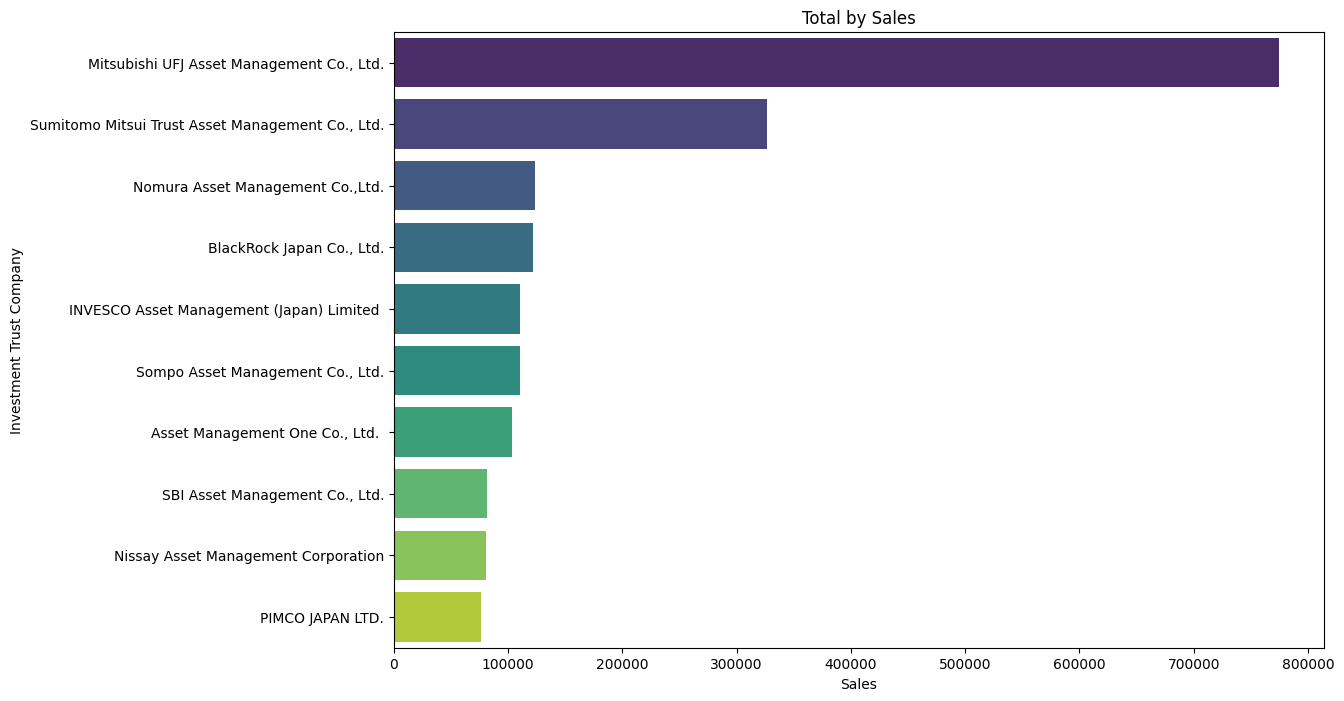

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


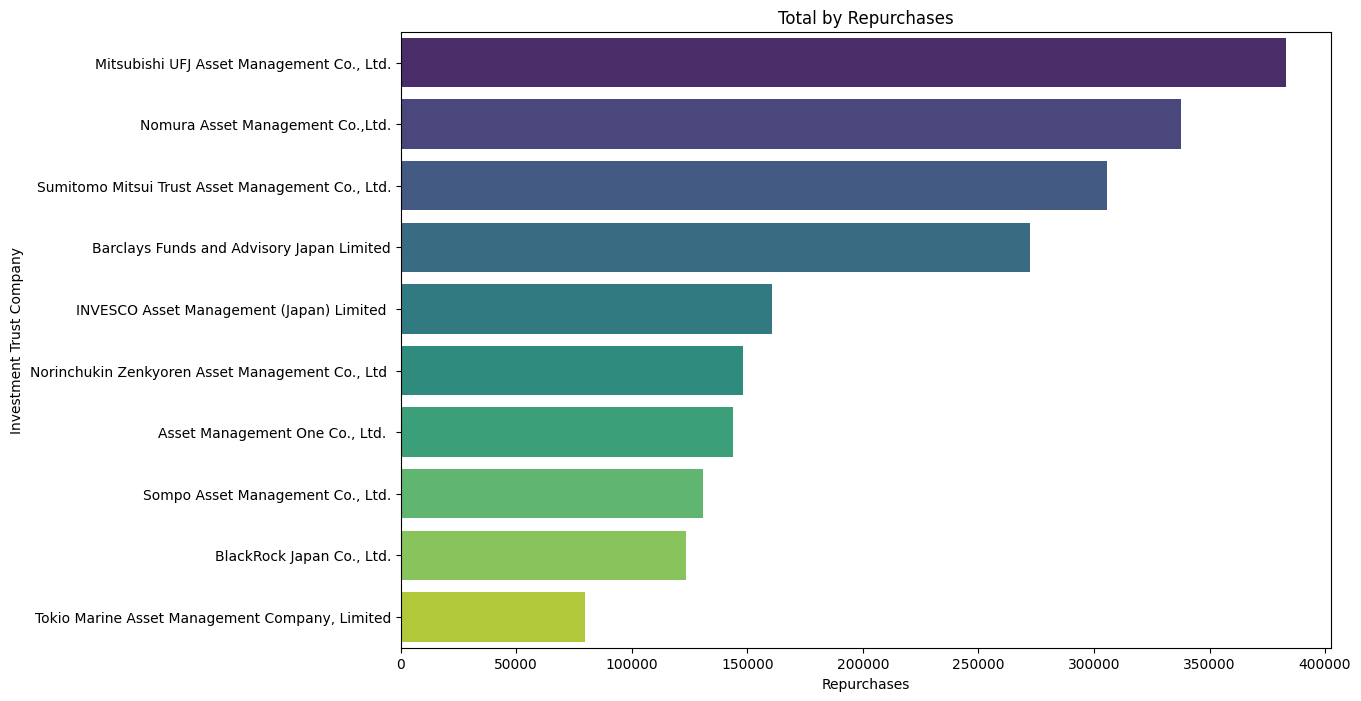

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


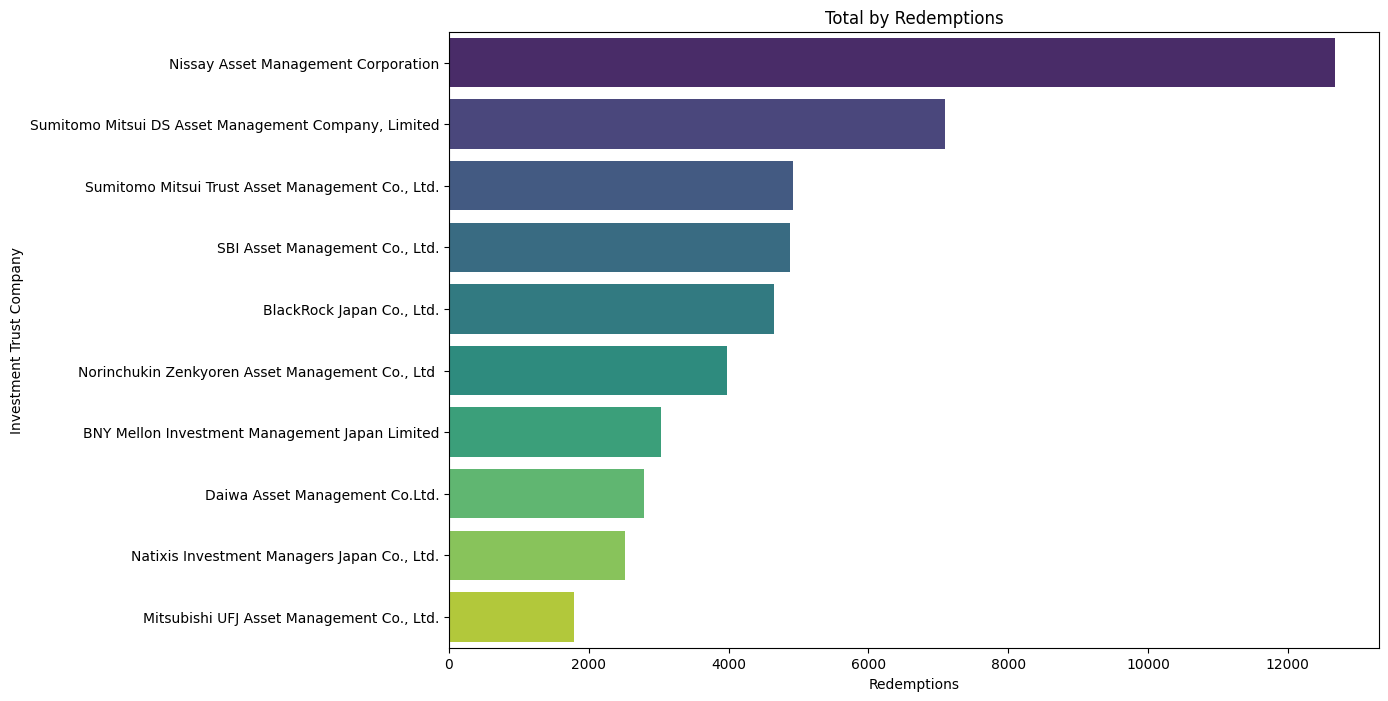

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


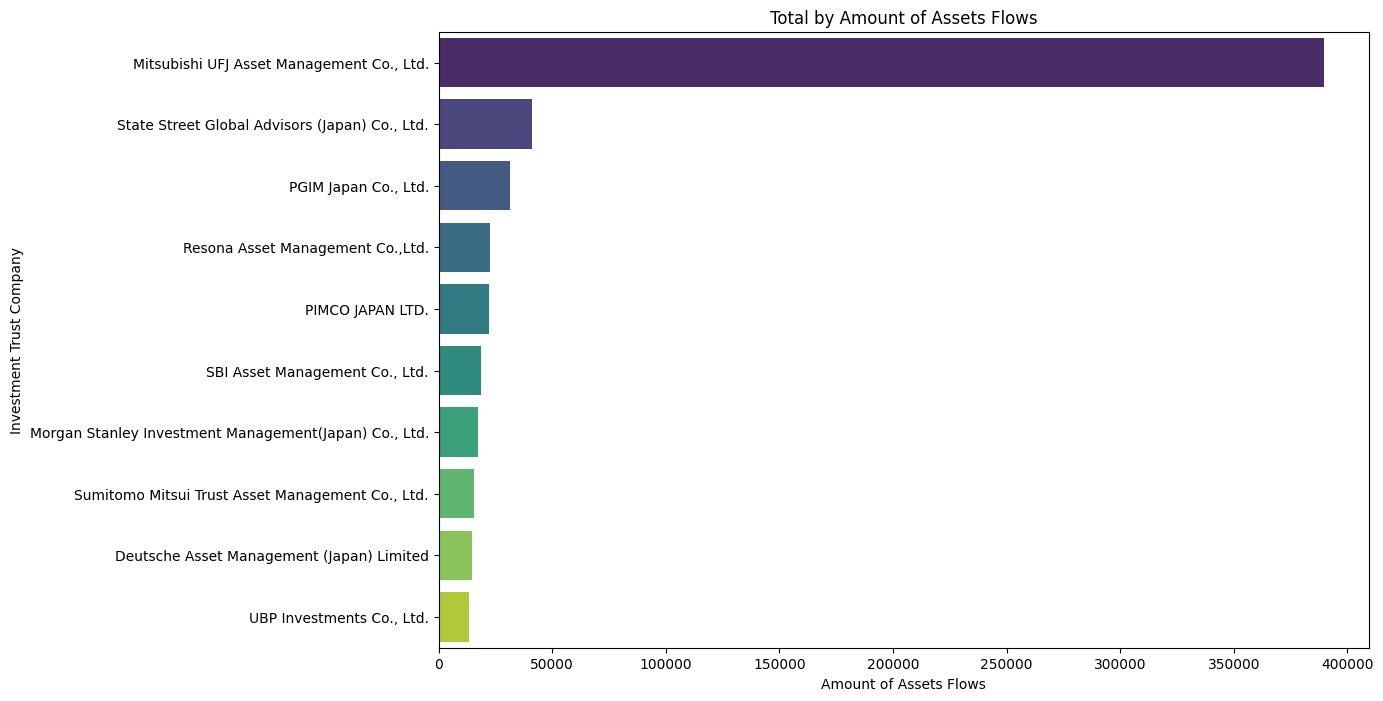

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


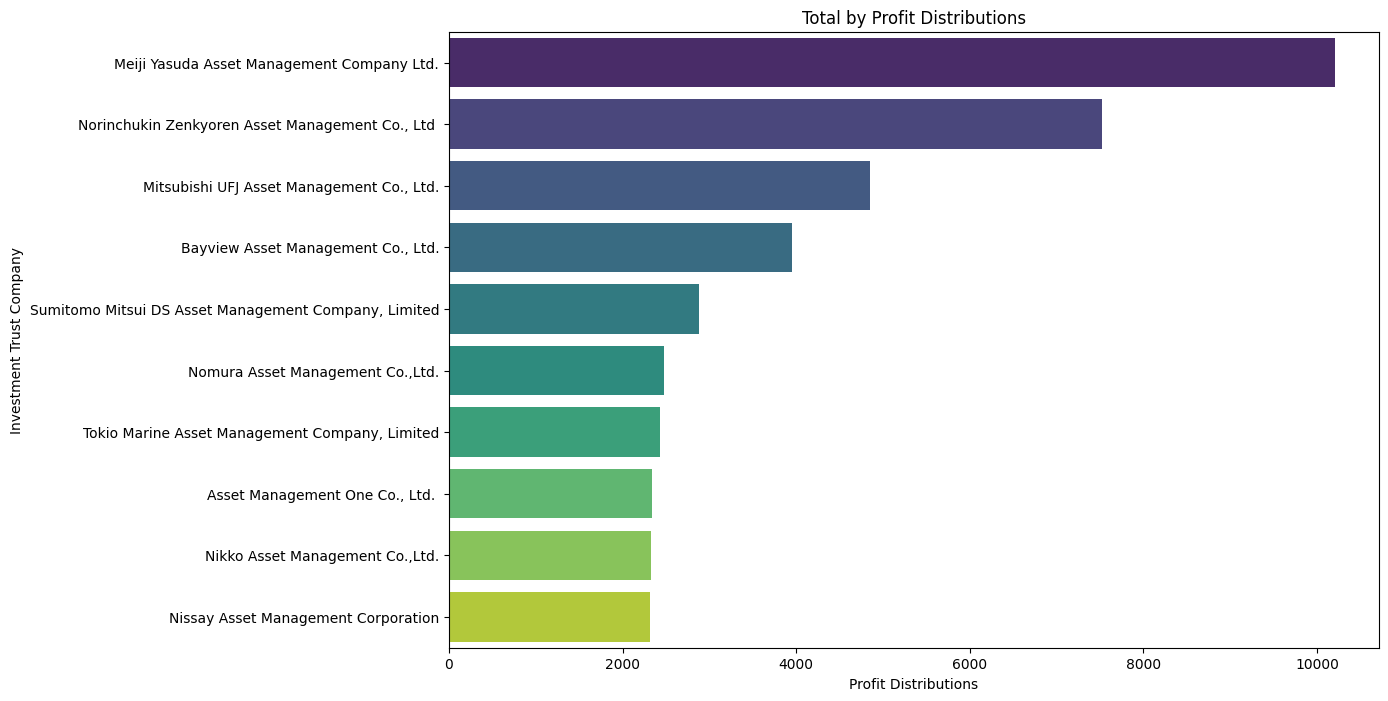

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


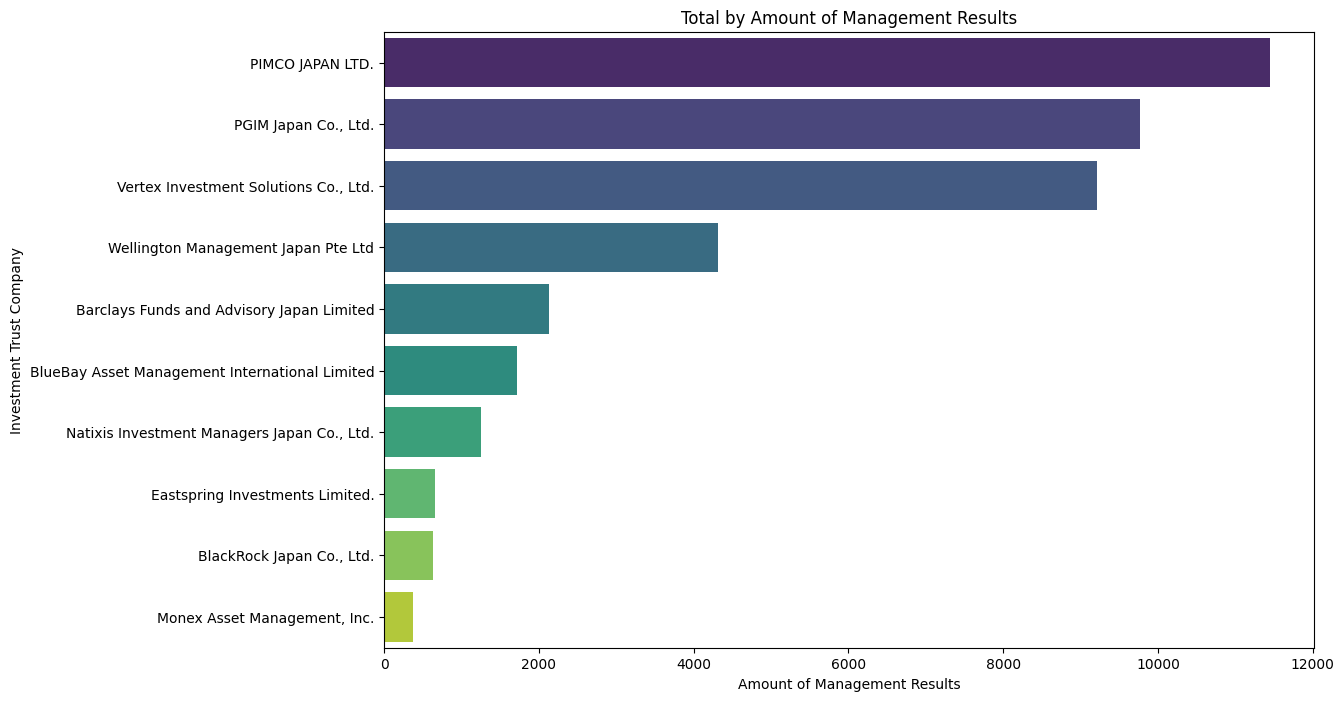

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


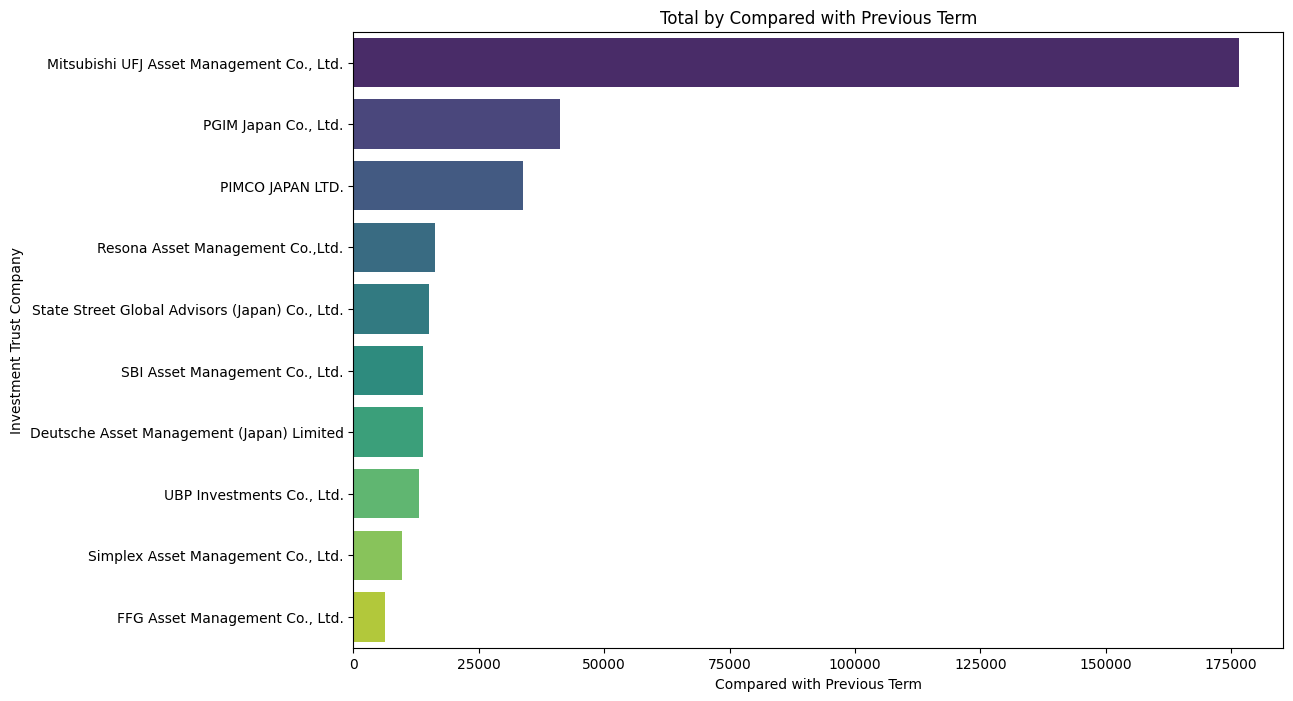

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


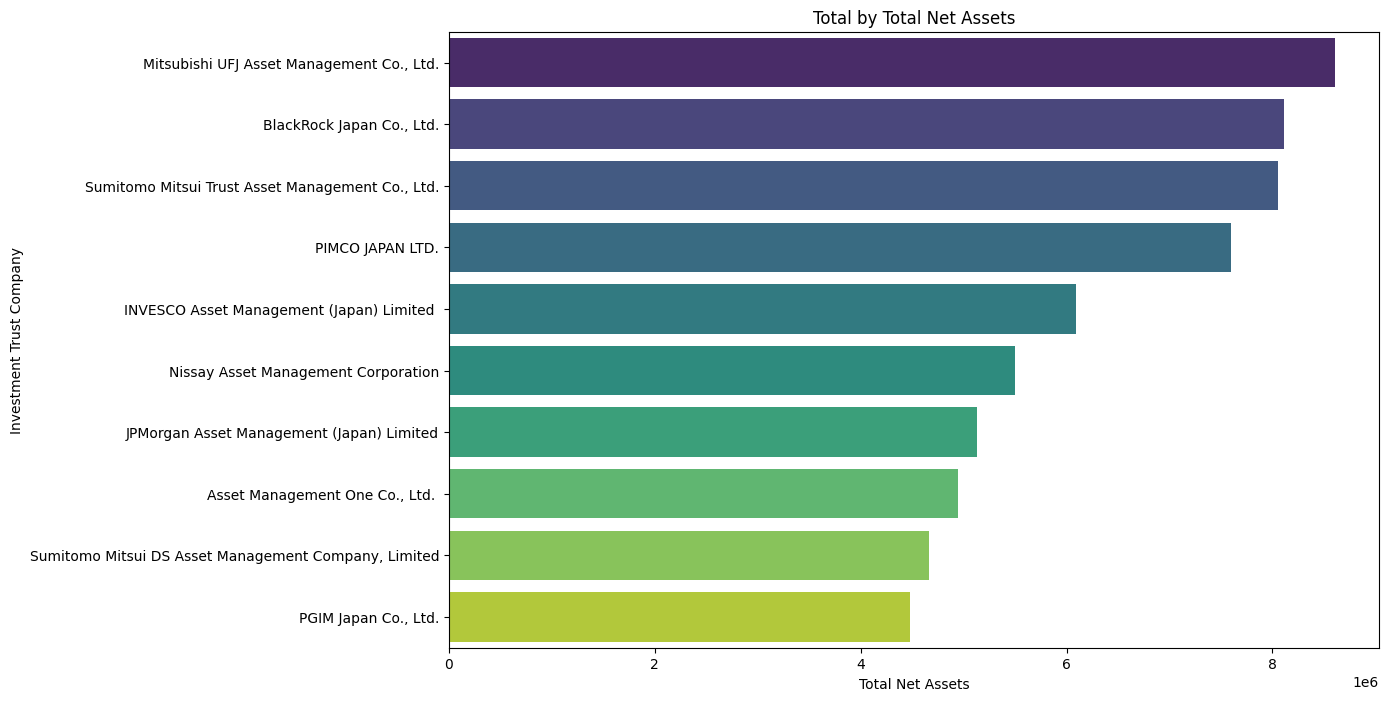

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


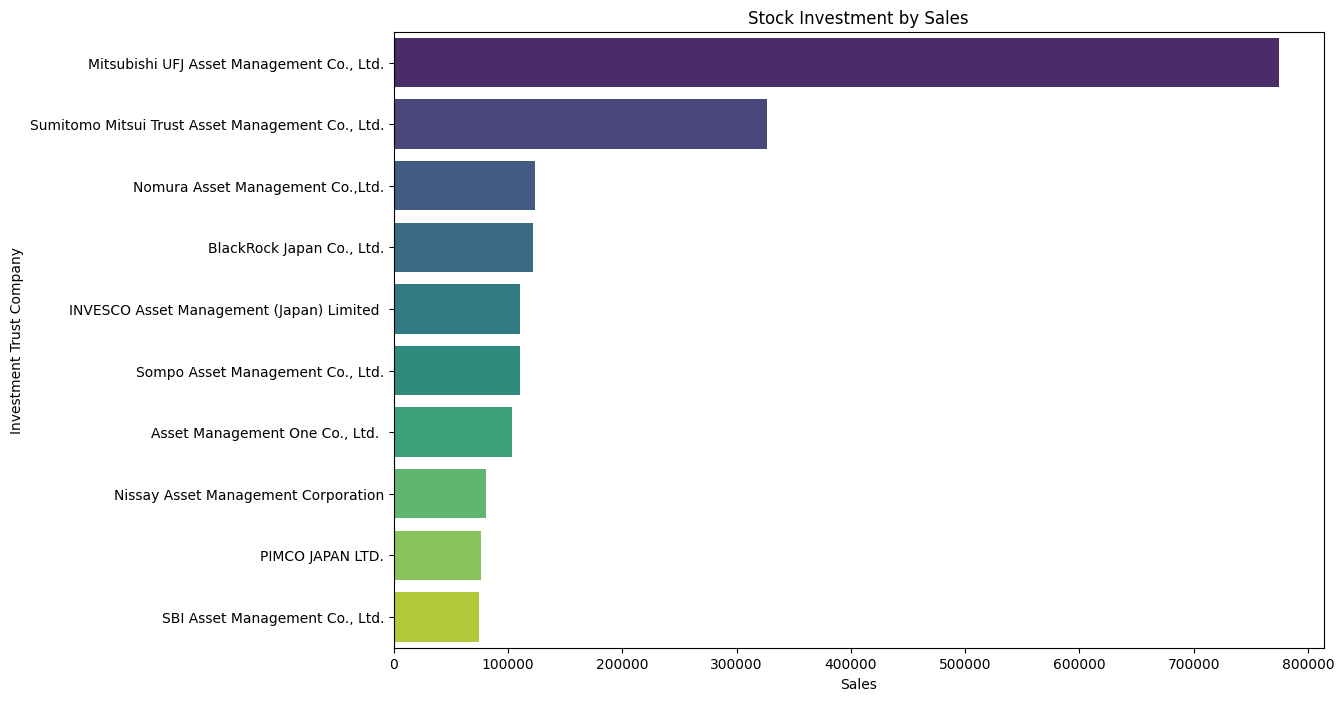

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


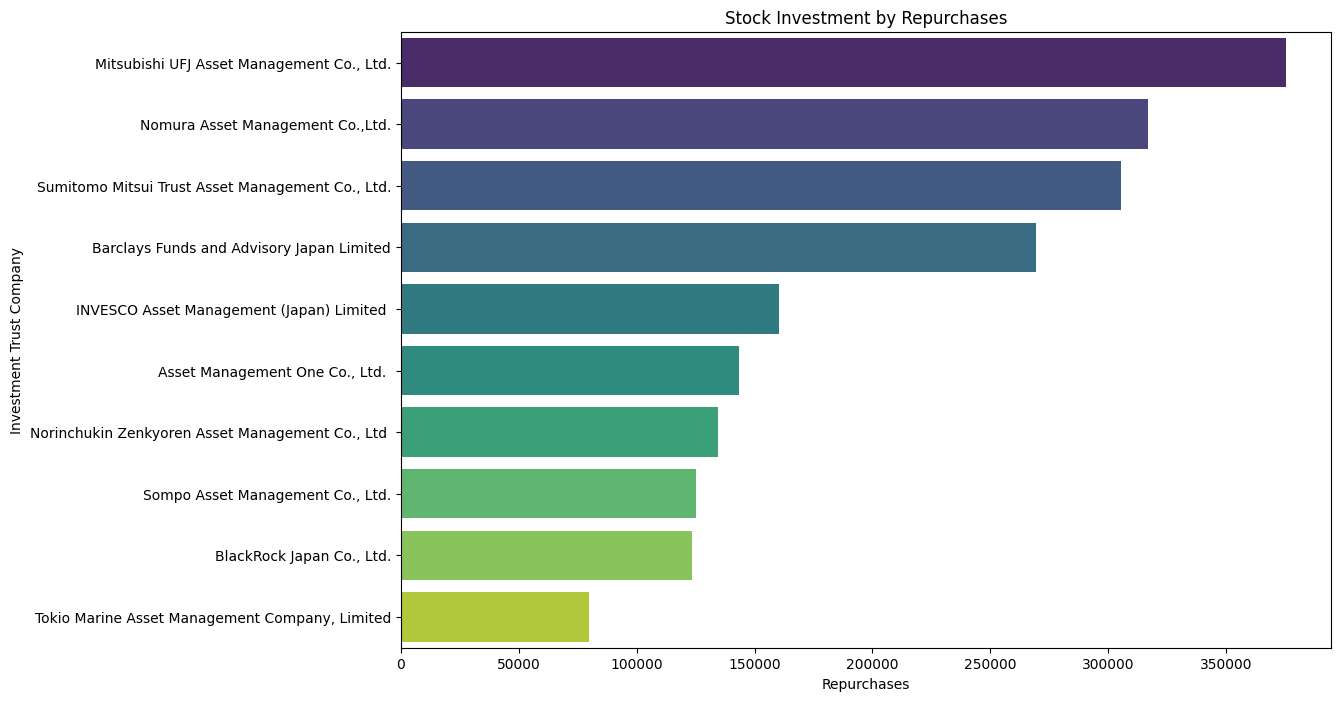

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


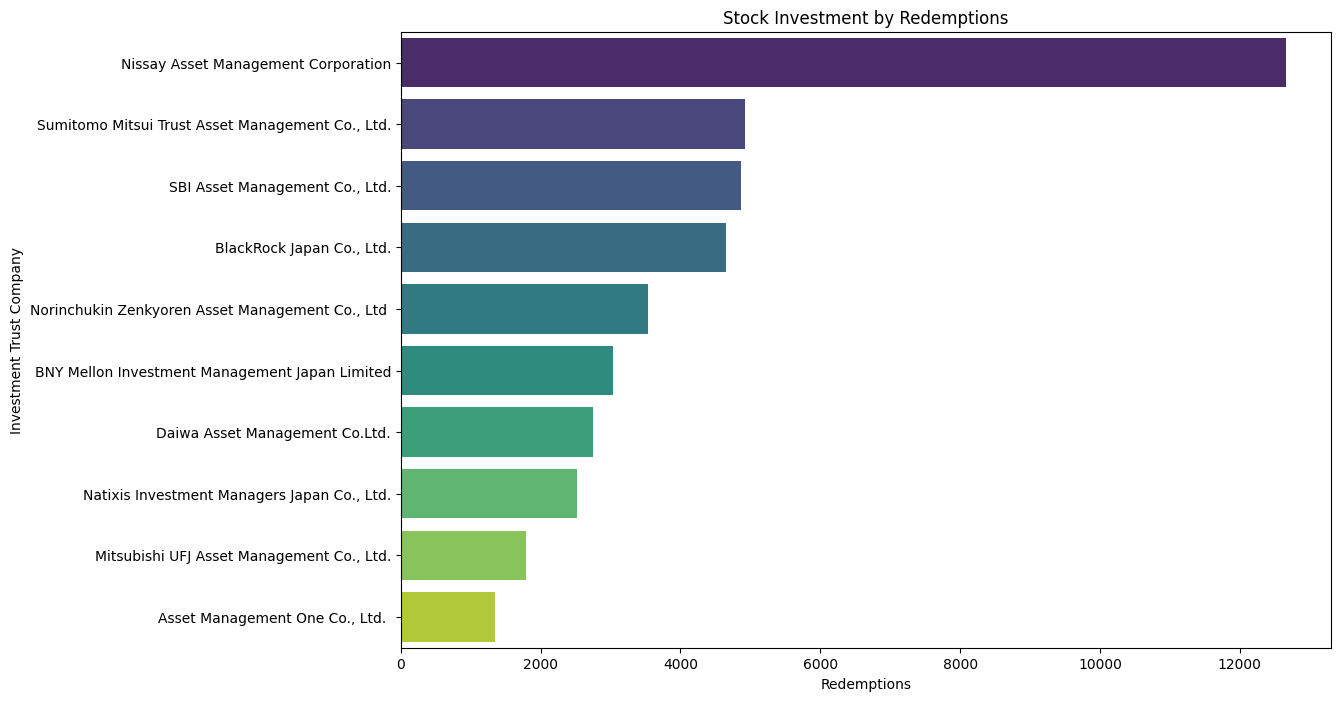

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


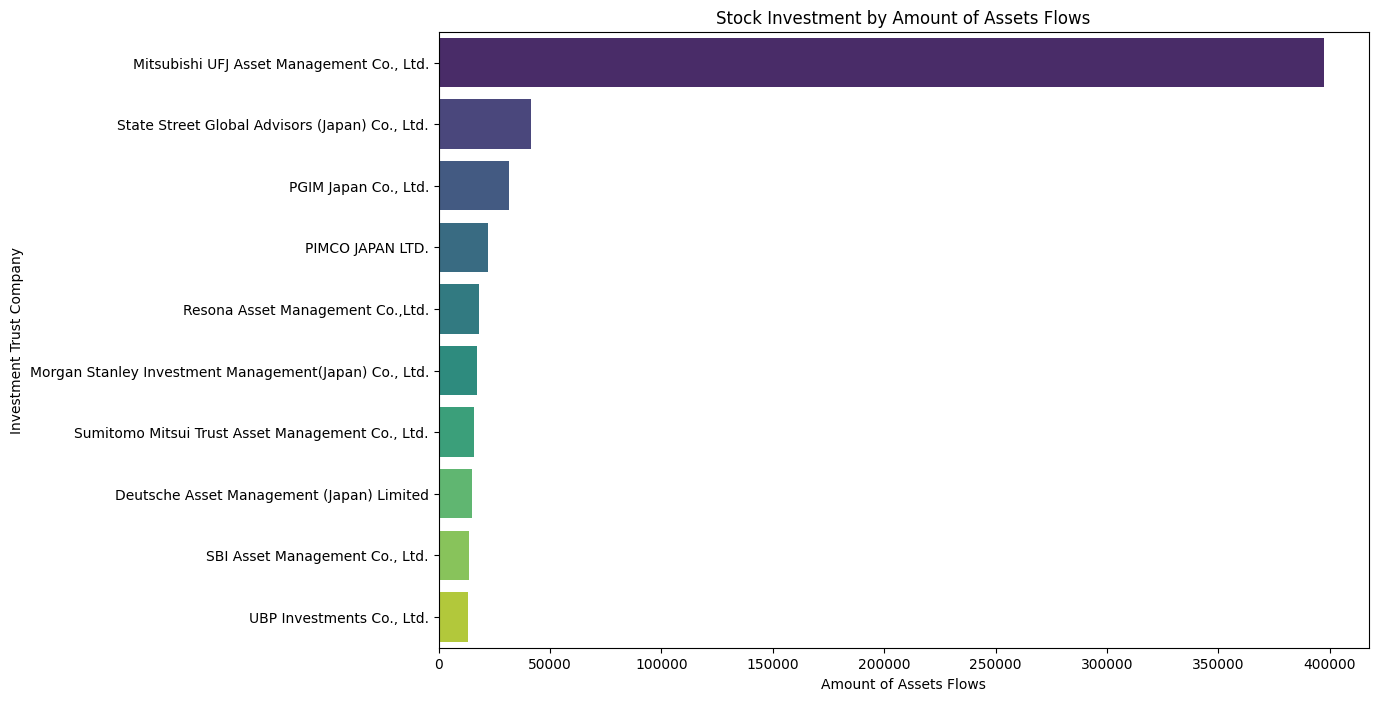

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


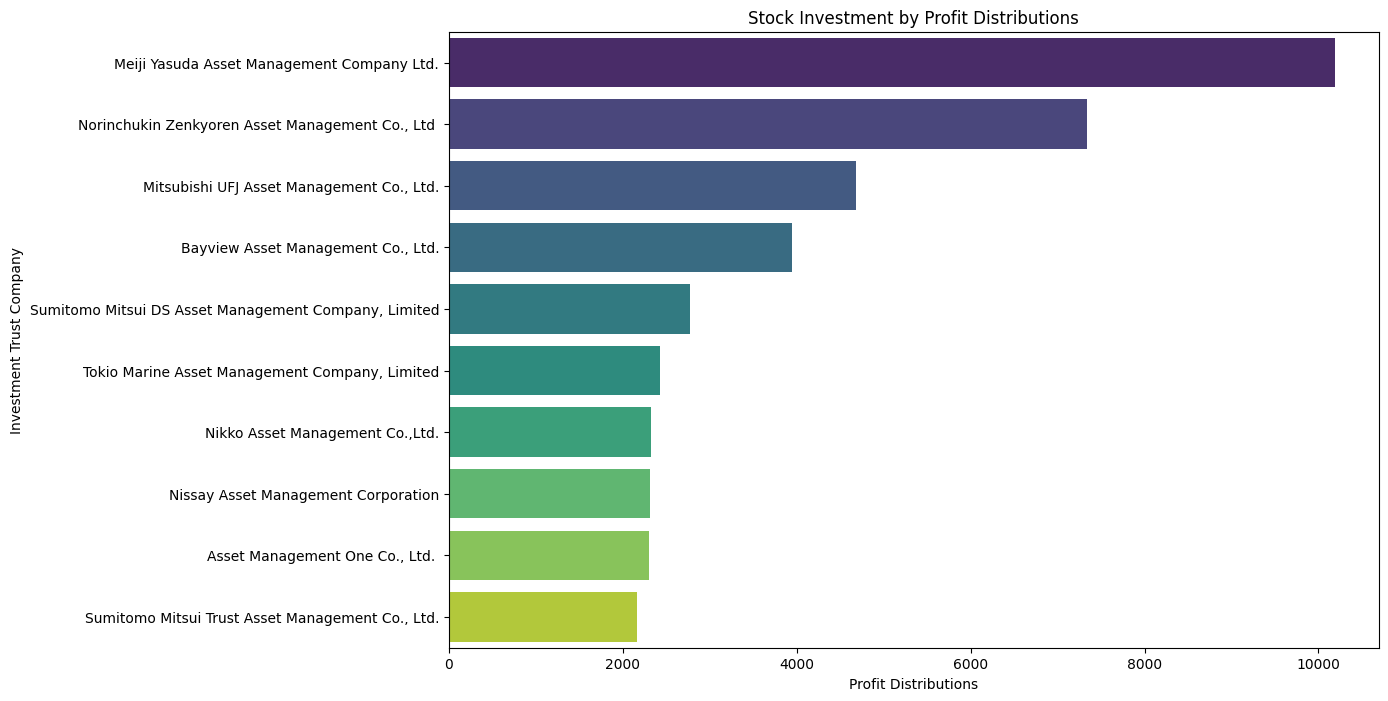

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


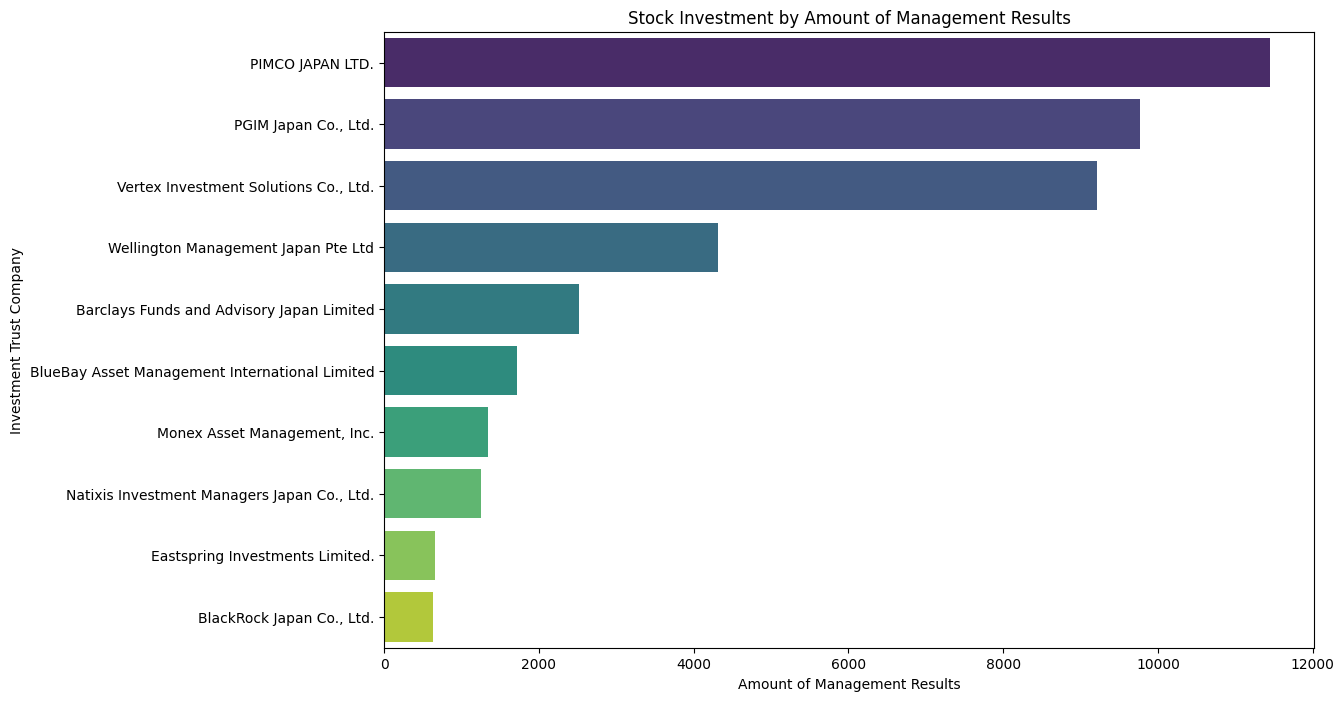

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


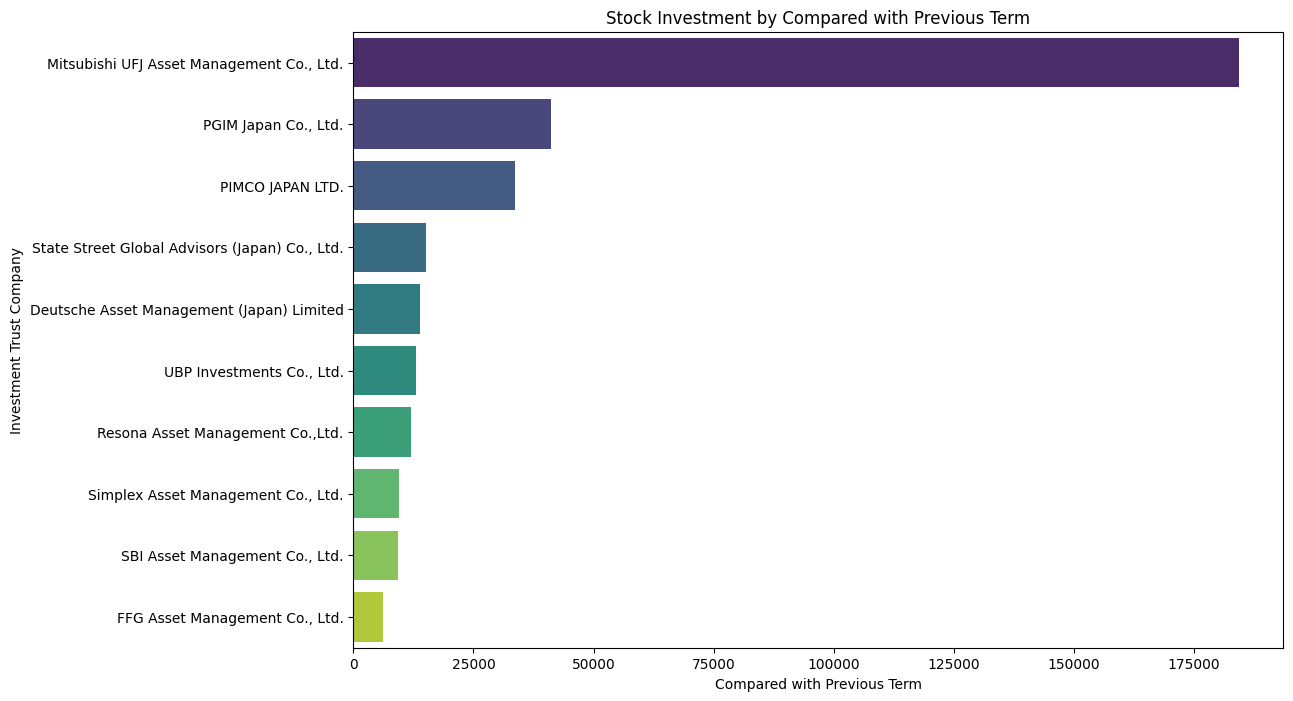

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


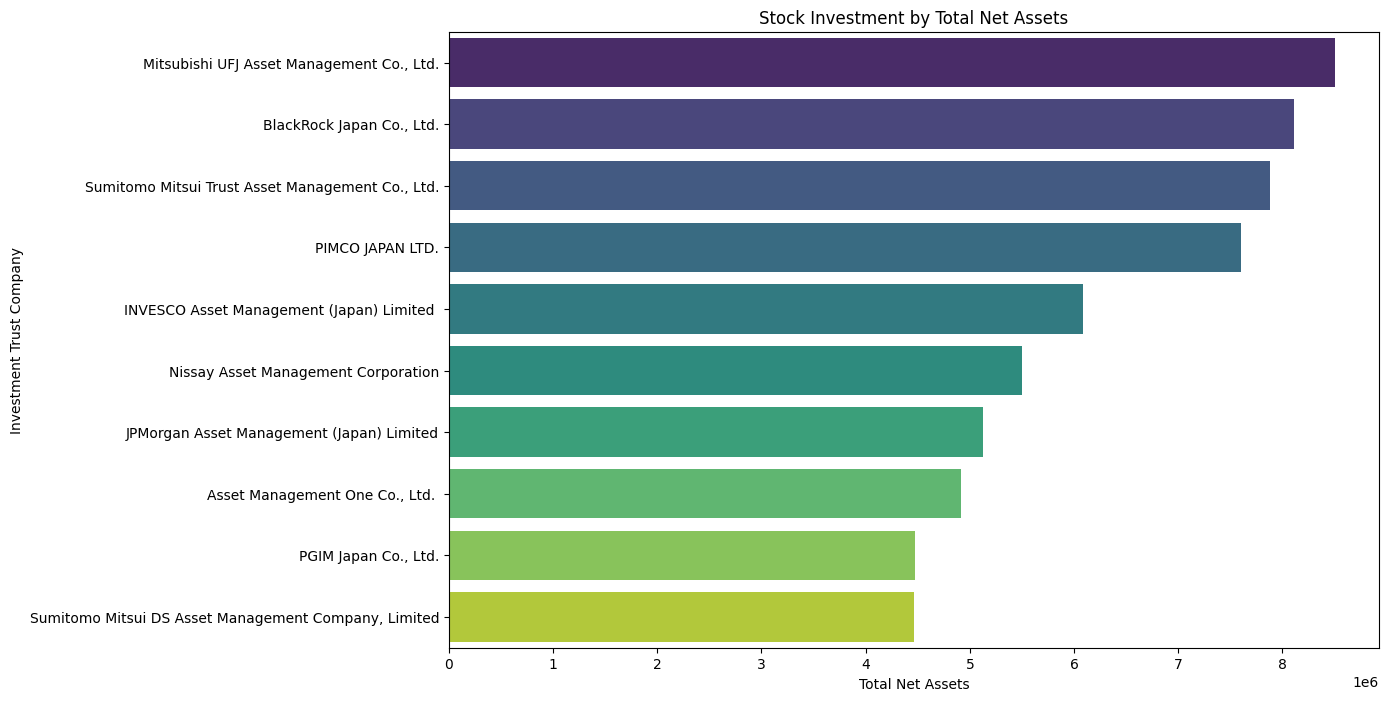

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


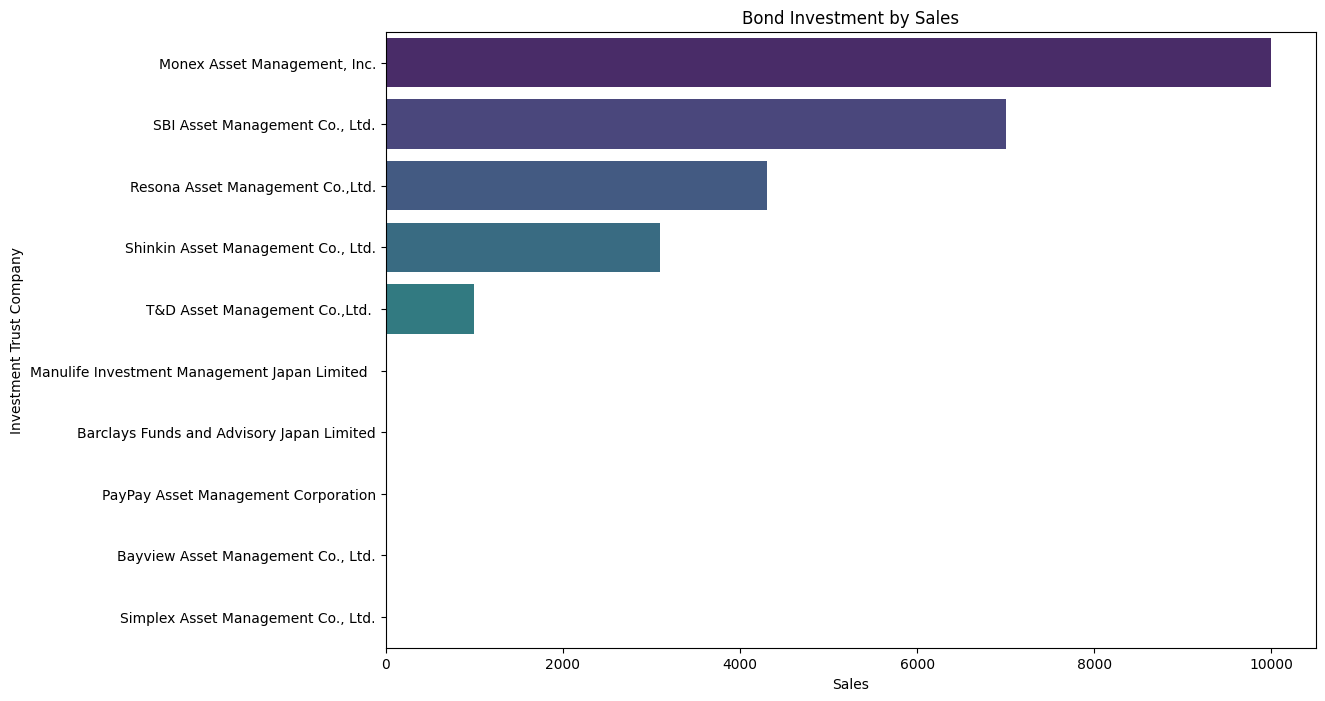

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


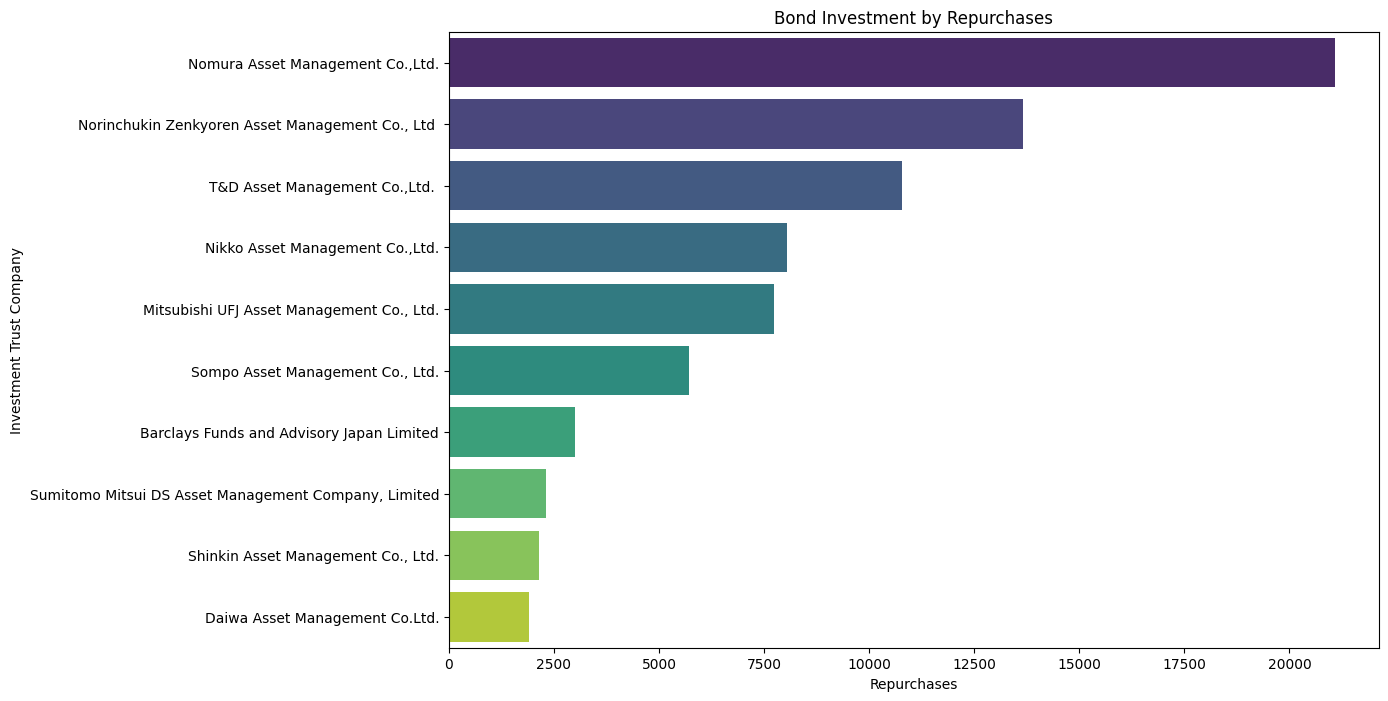

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


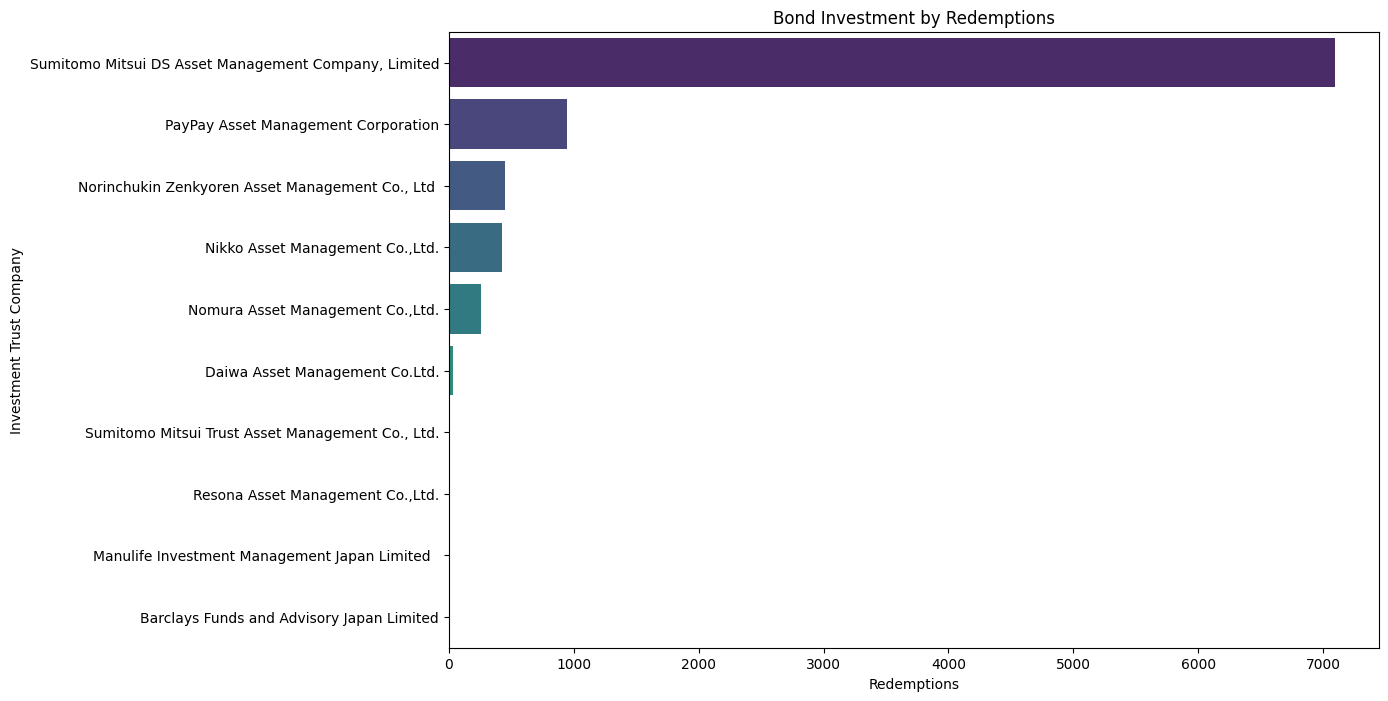

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


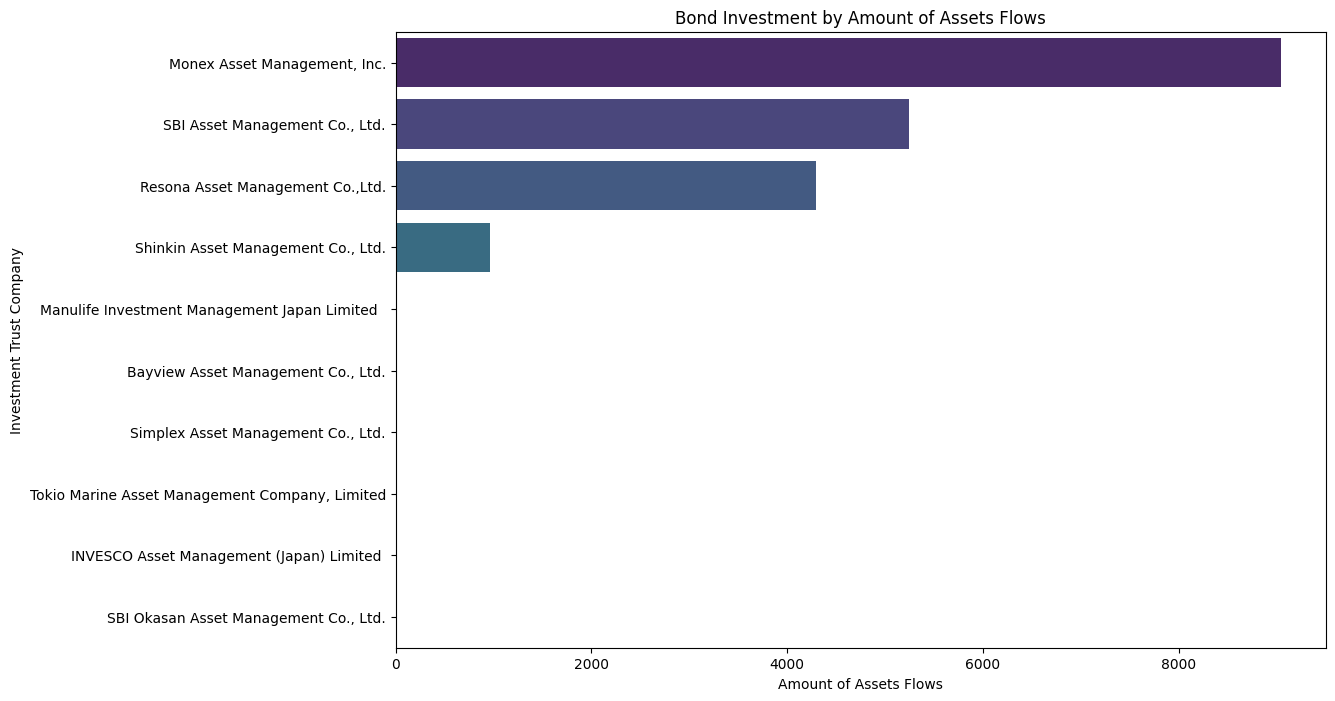

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


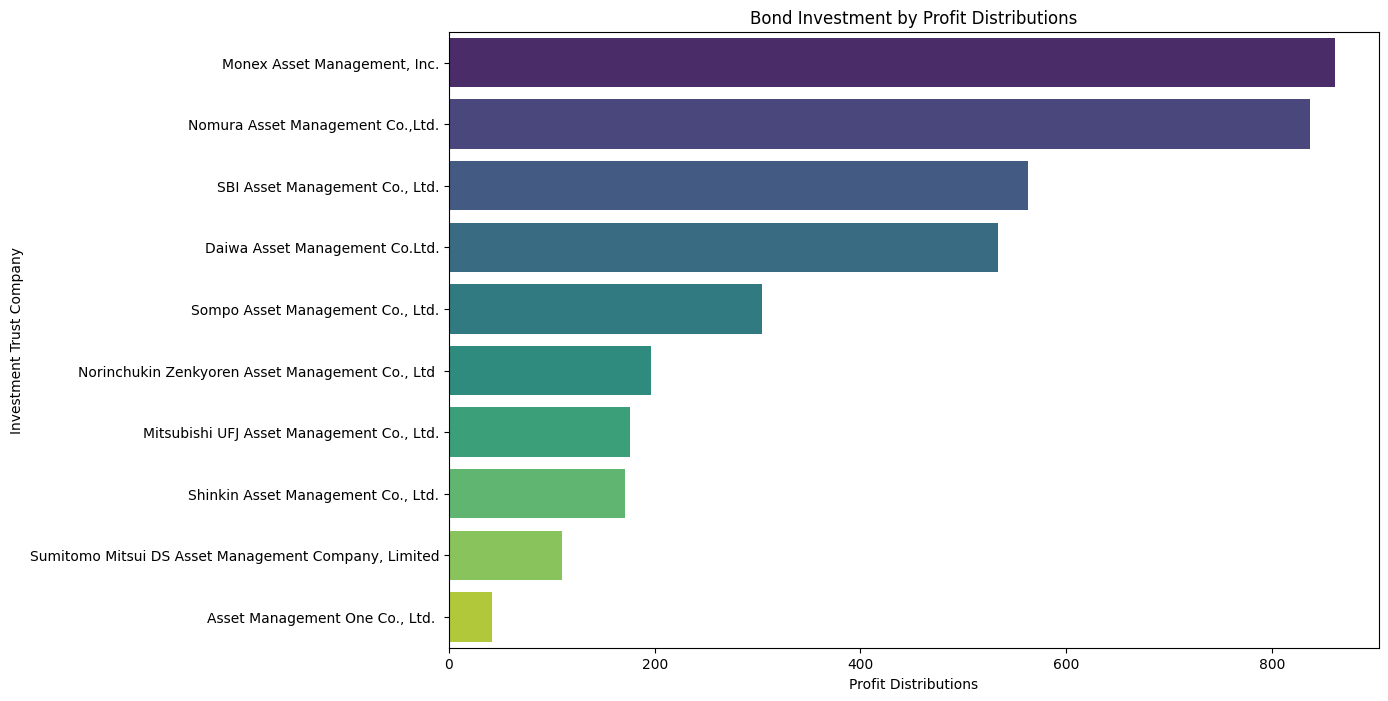

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


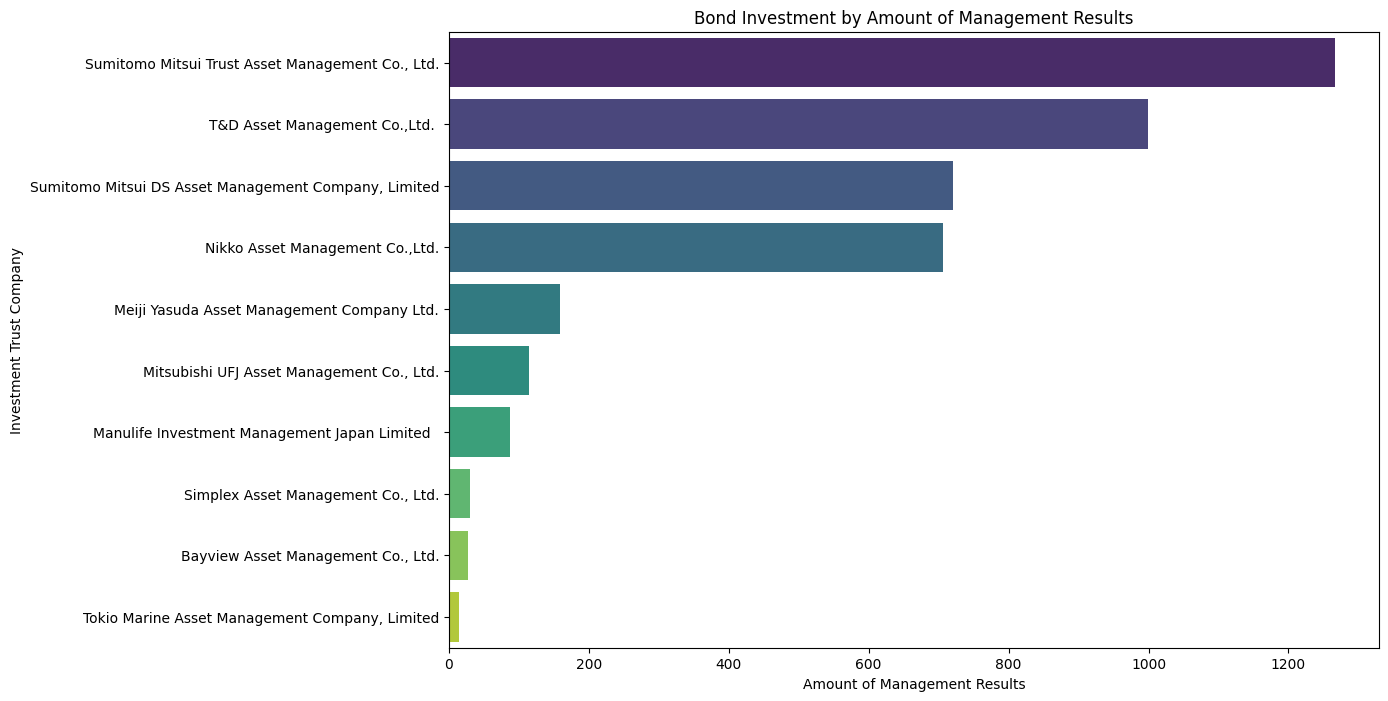

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


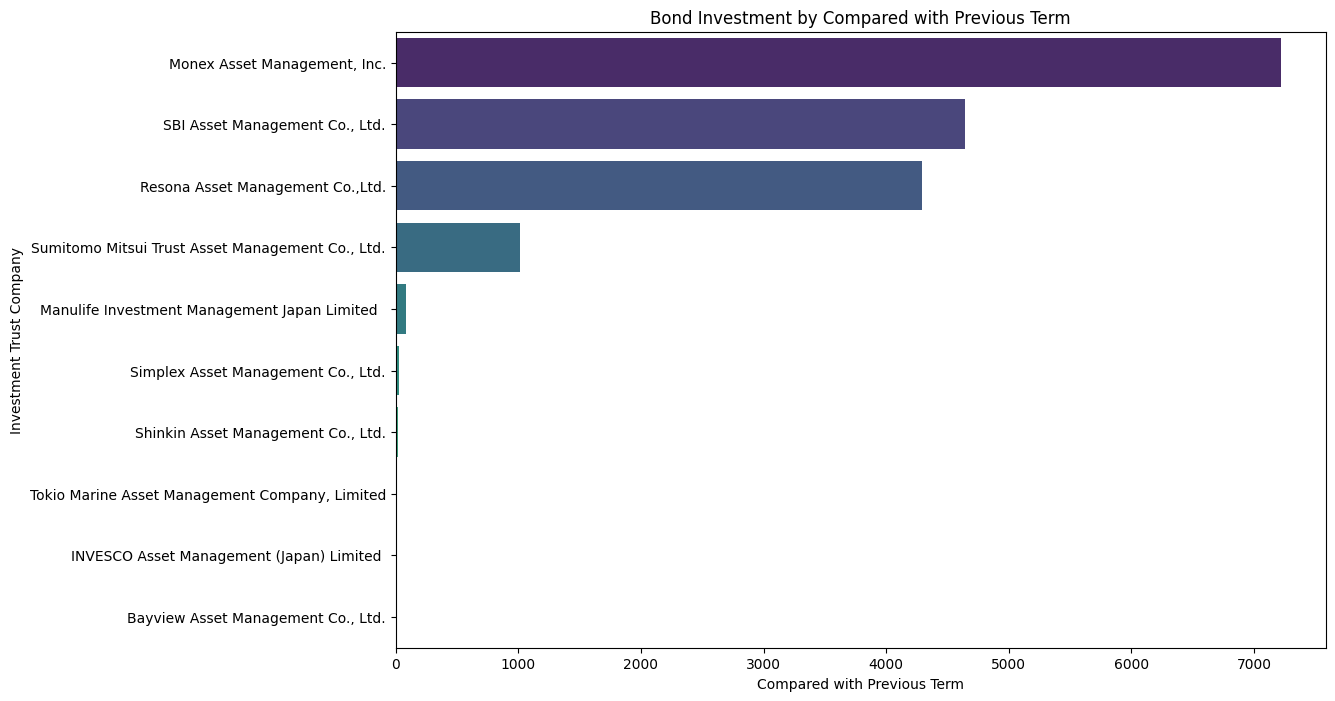

/tmp/ipykernel_4250/3776877471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')


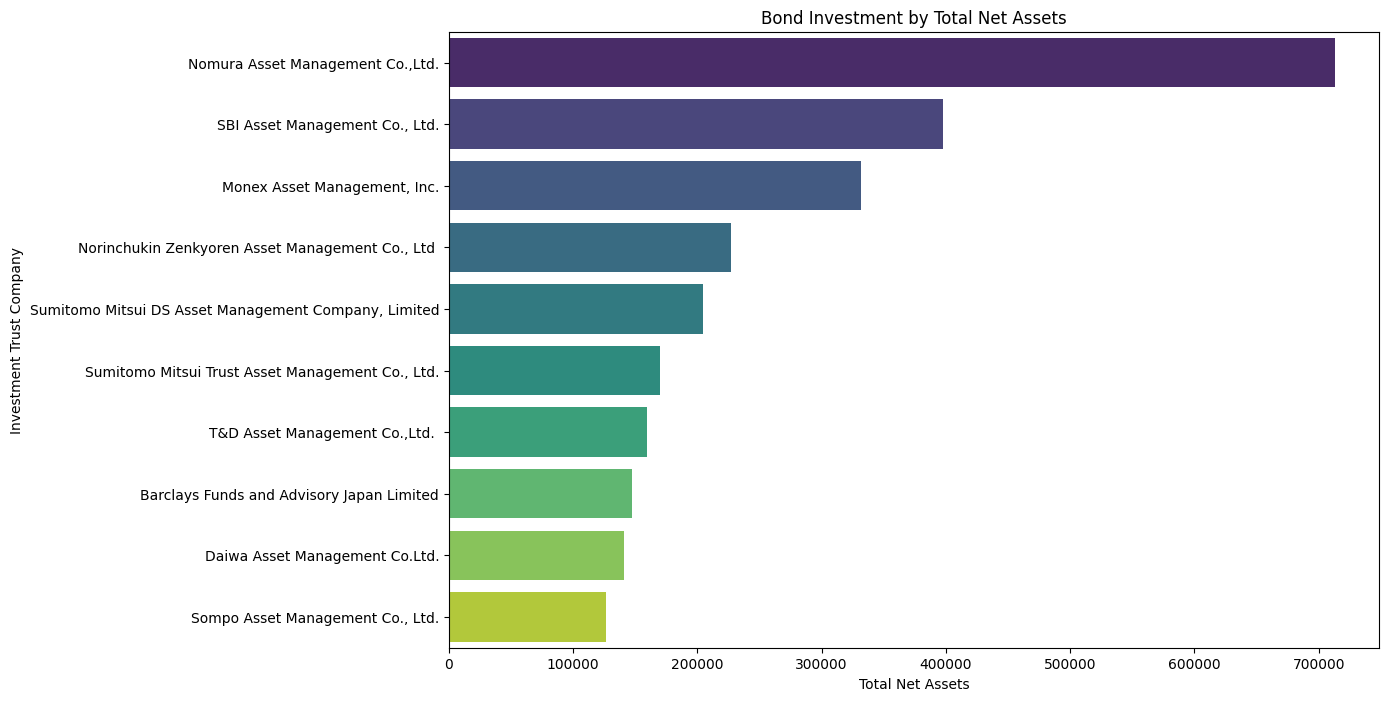

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


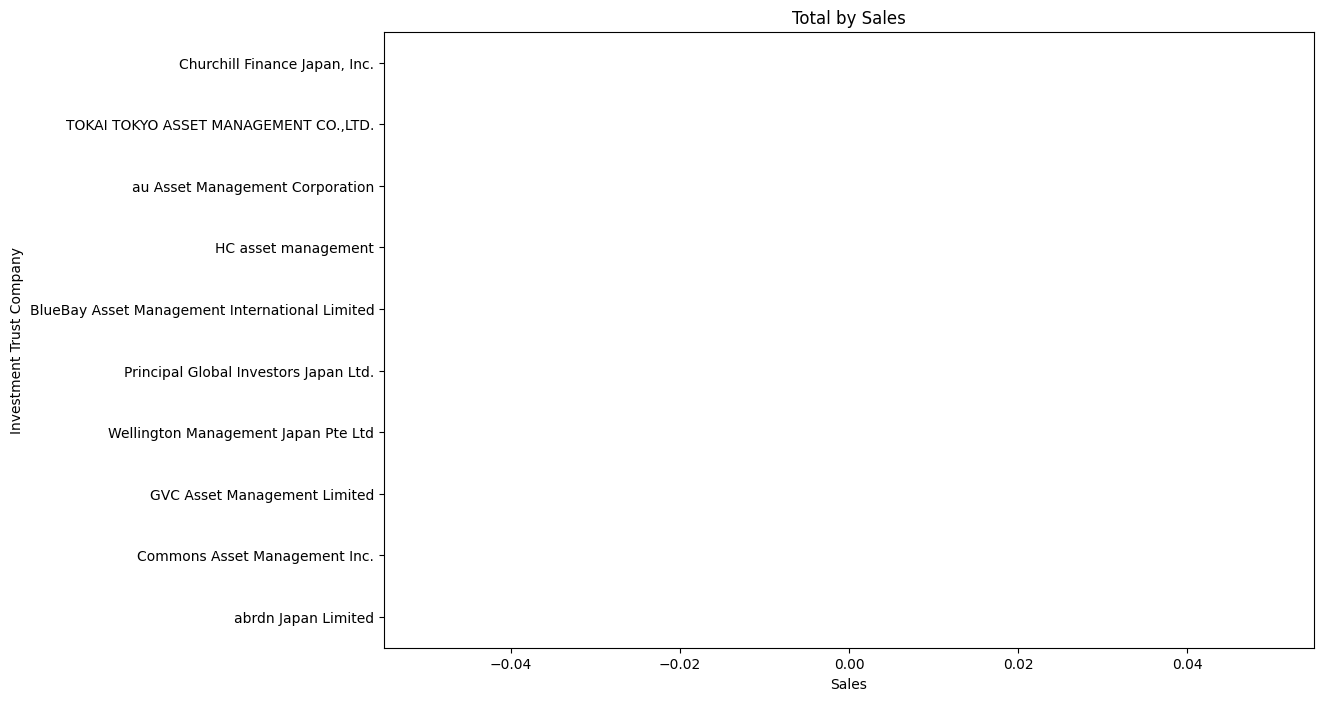

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


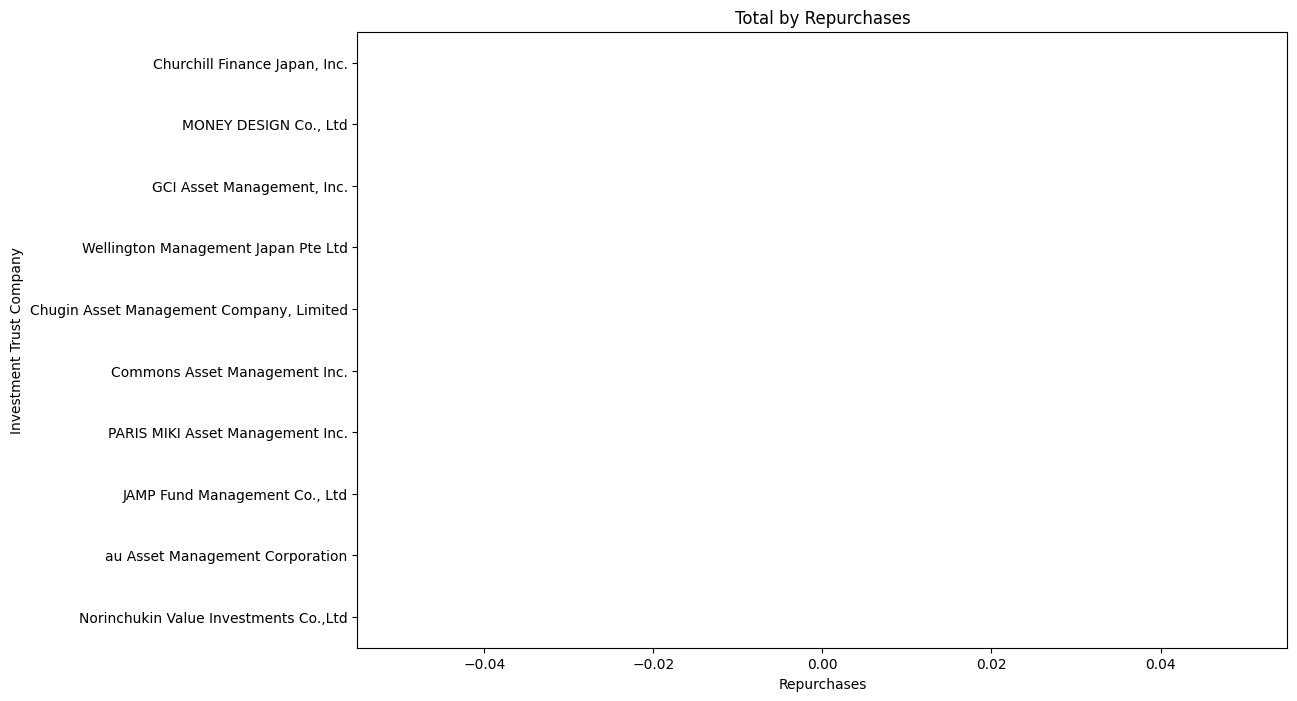

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


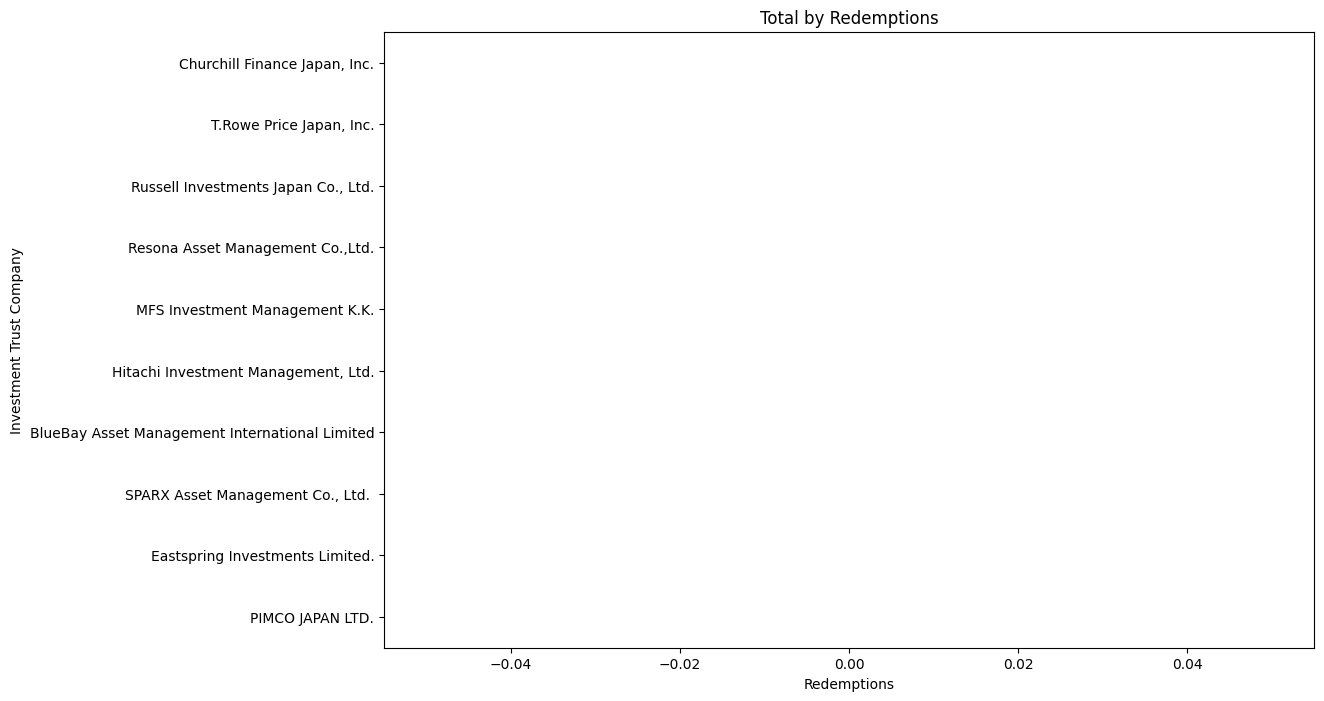

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


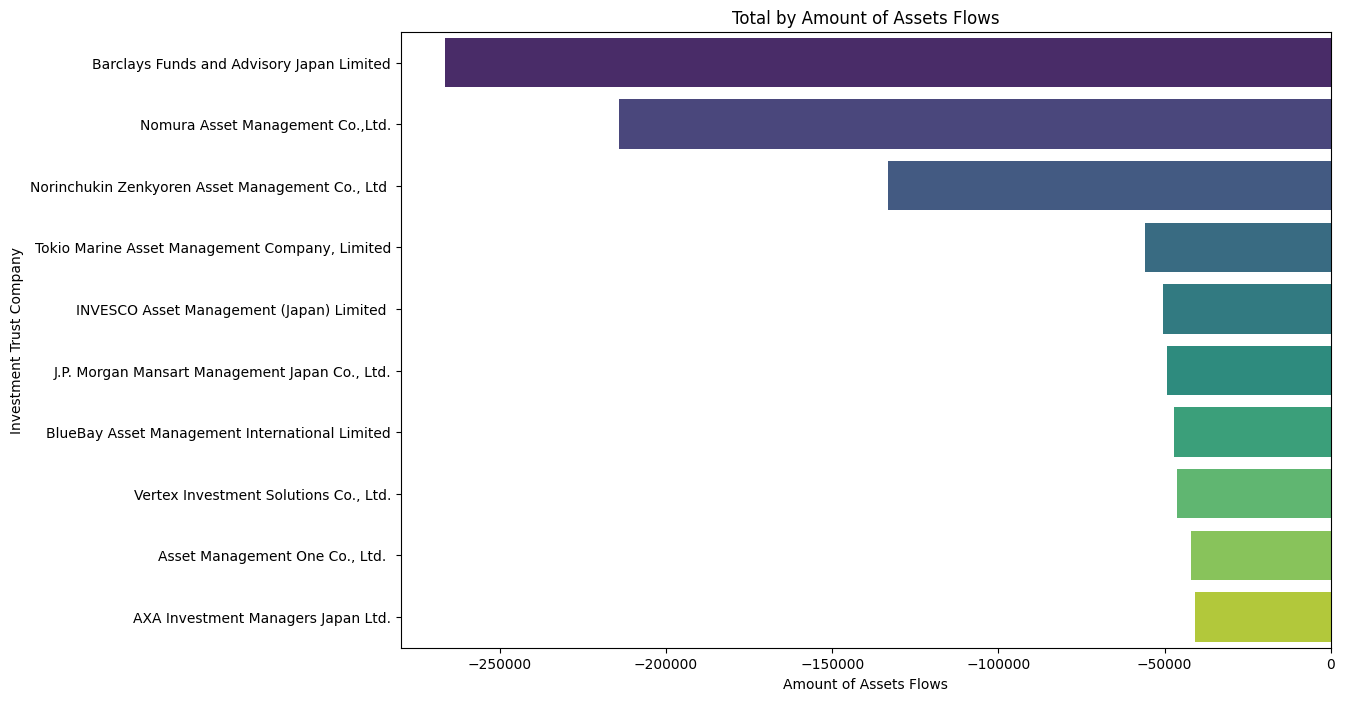

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


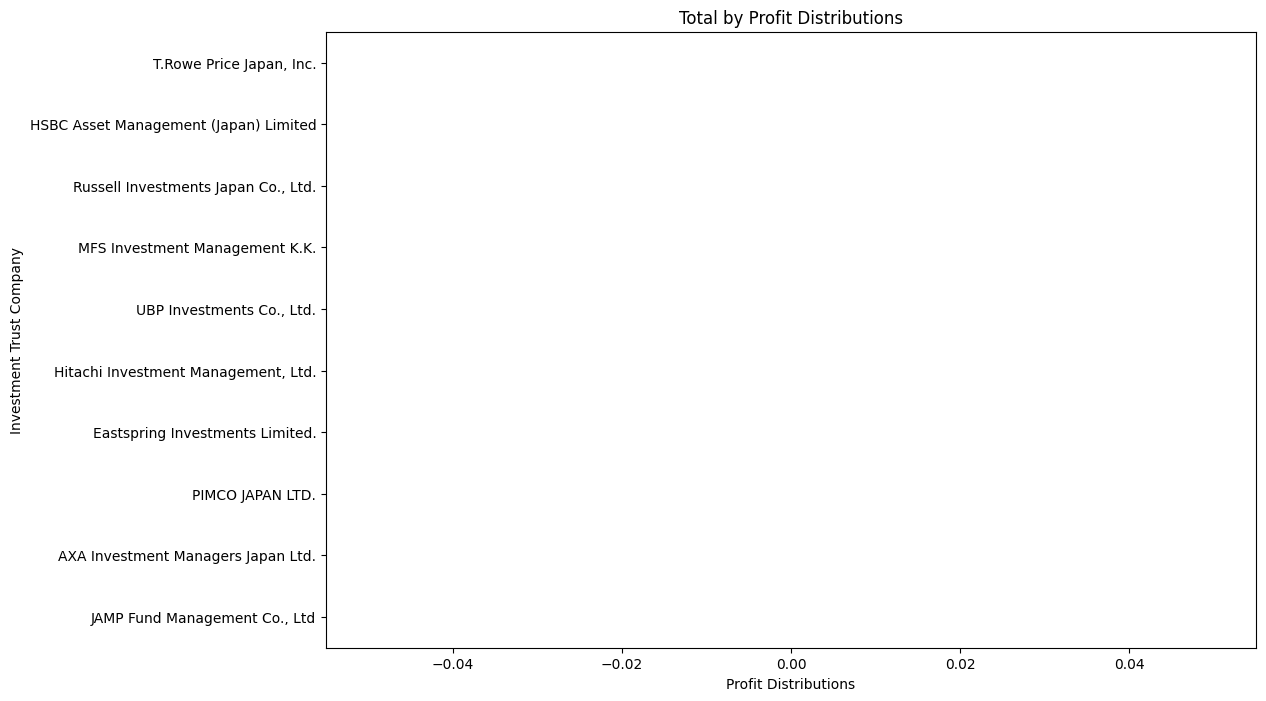

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


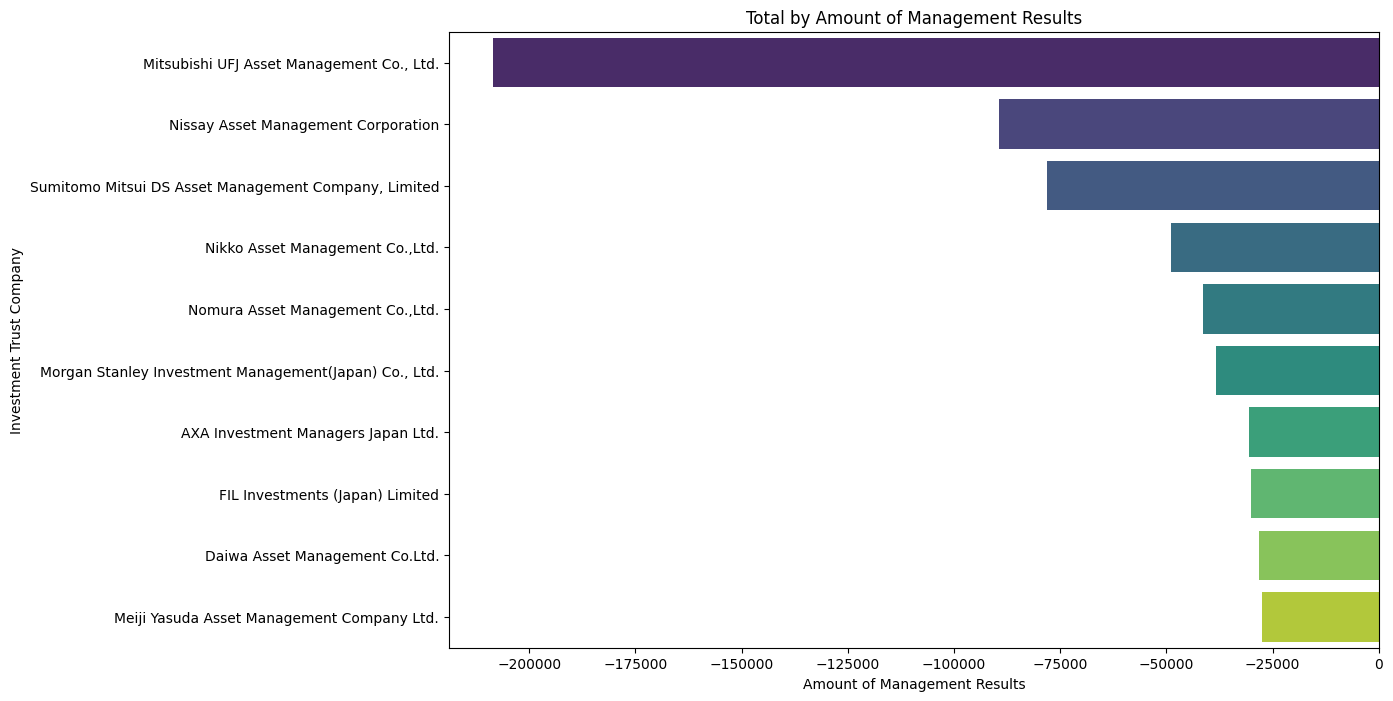

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


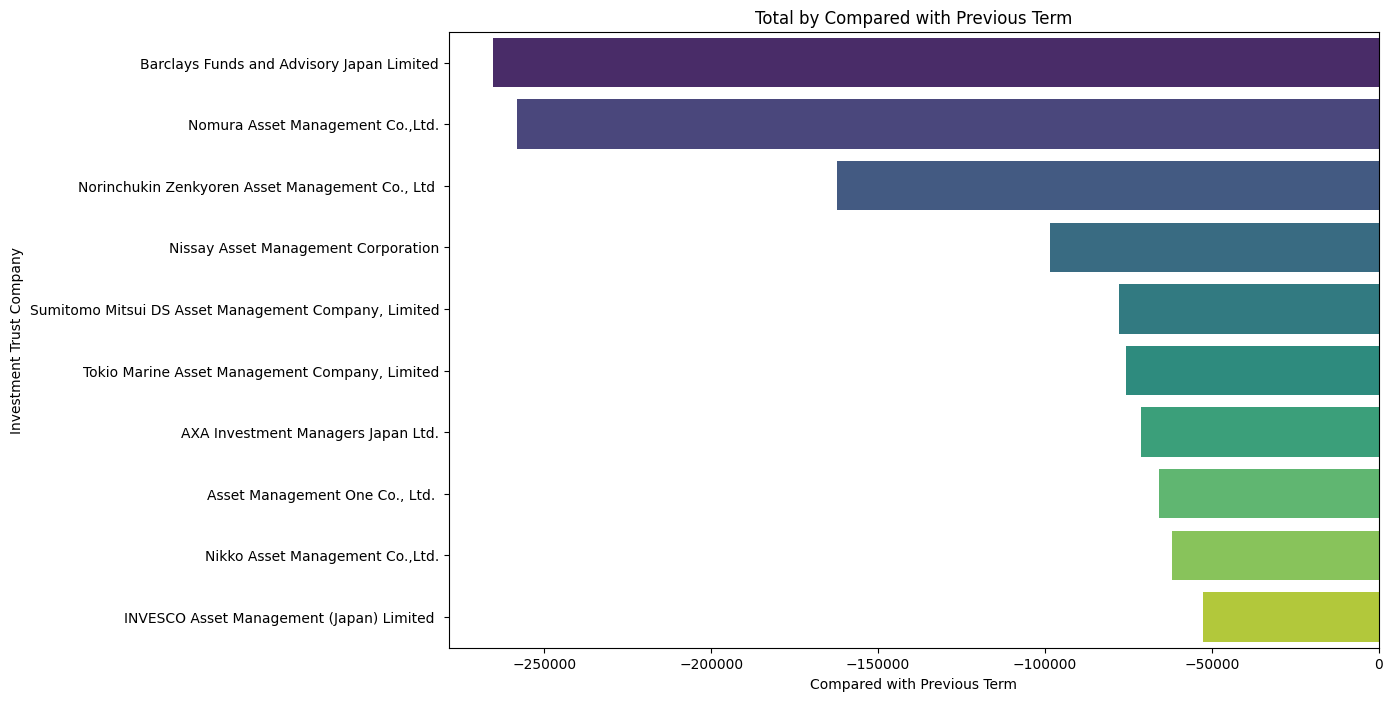

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


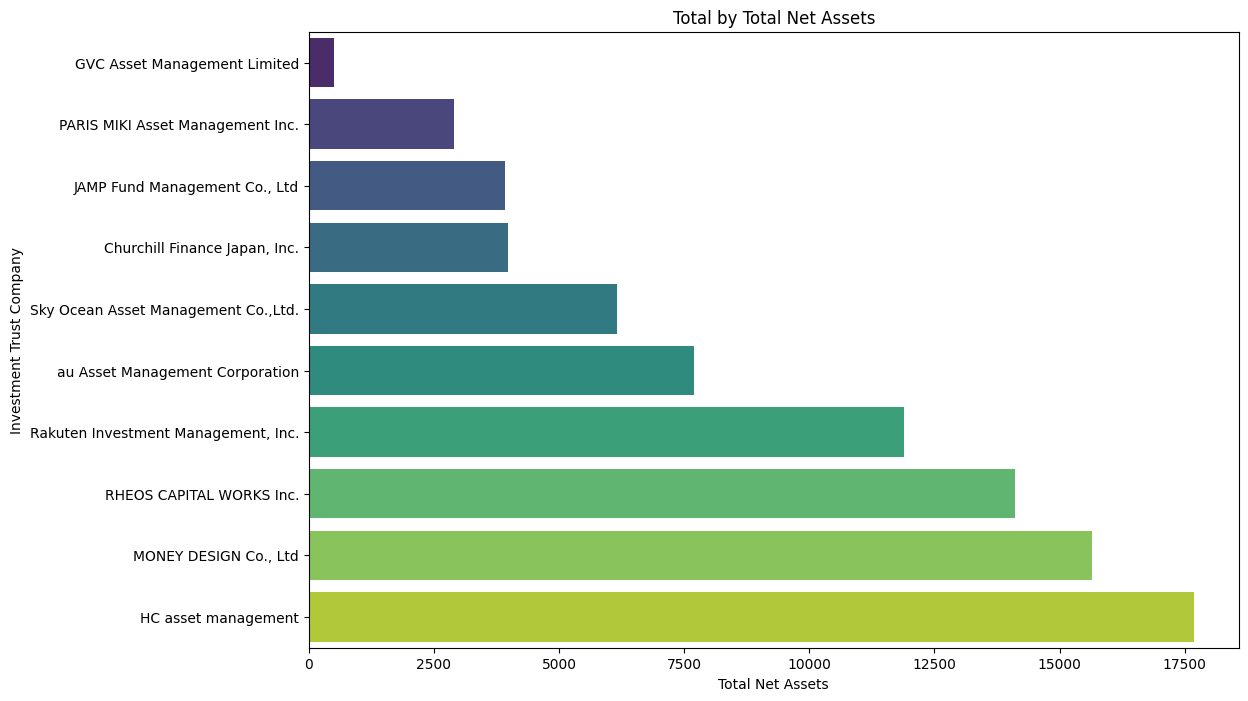

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


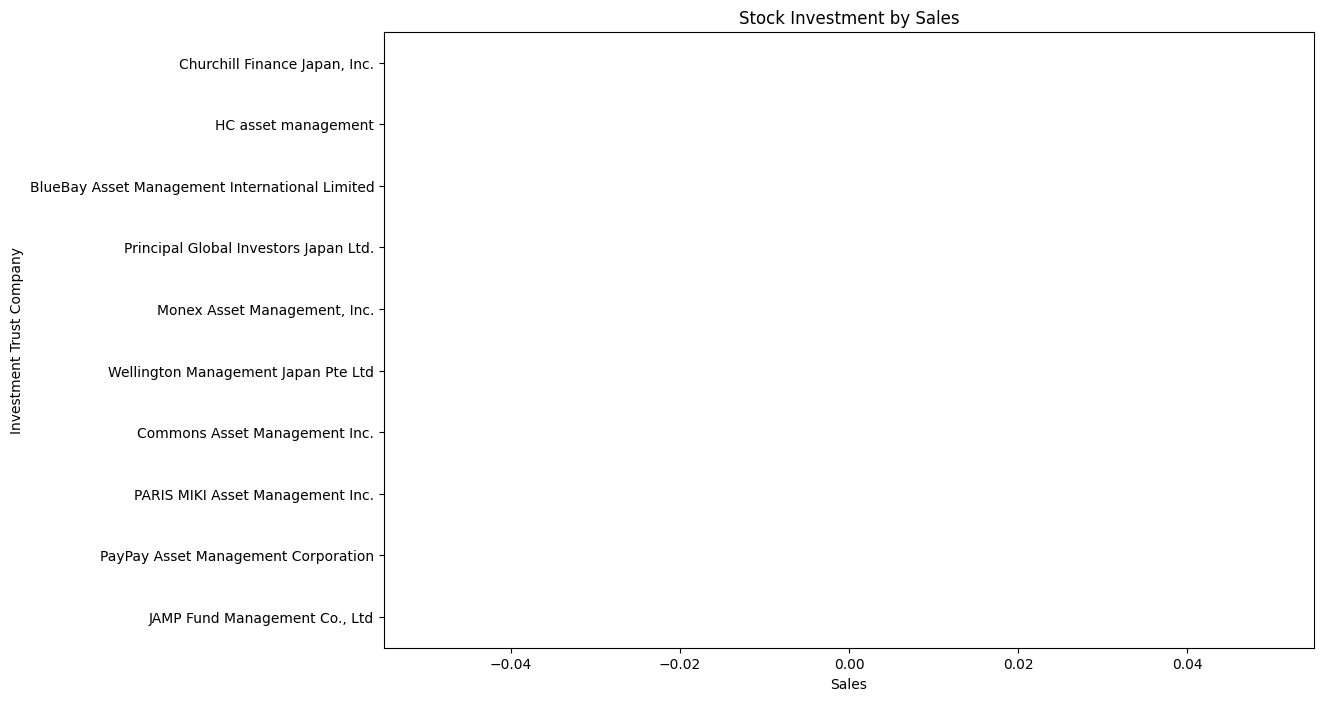

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


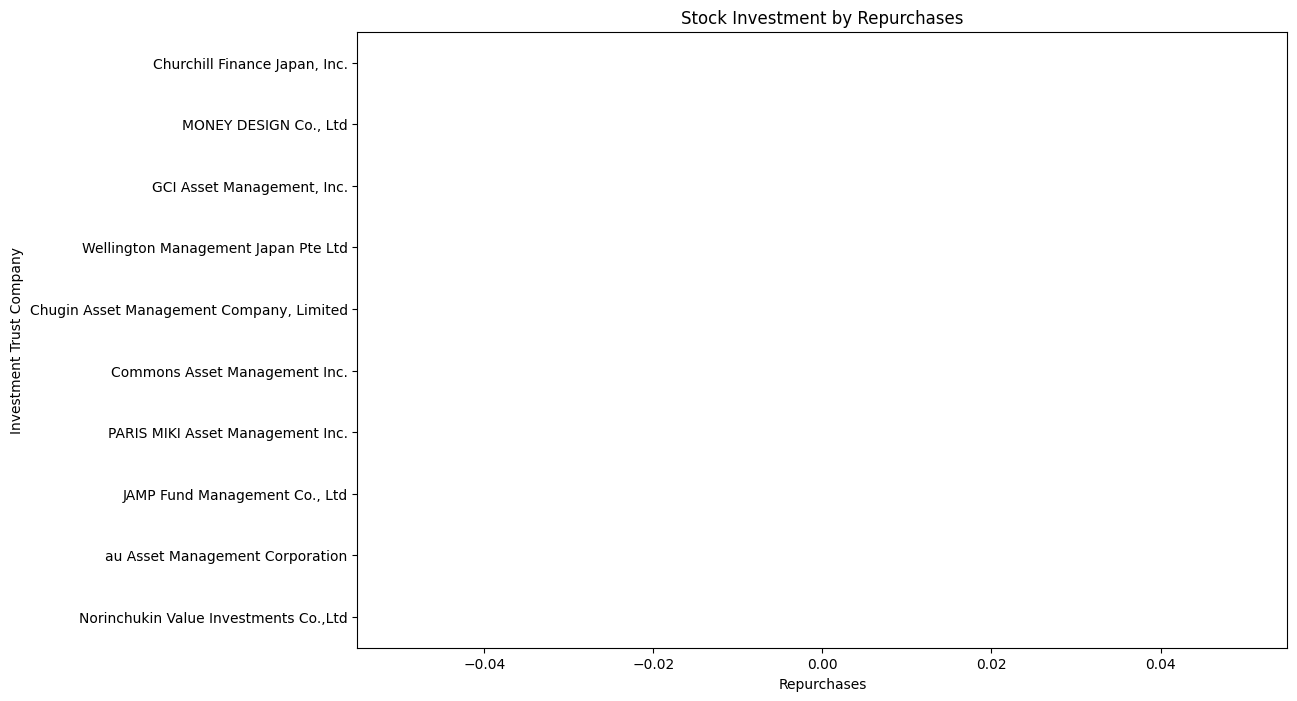

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


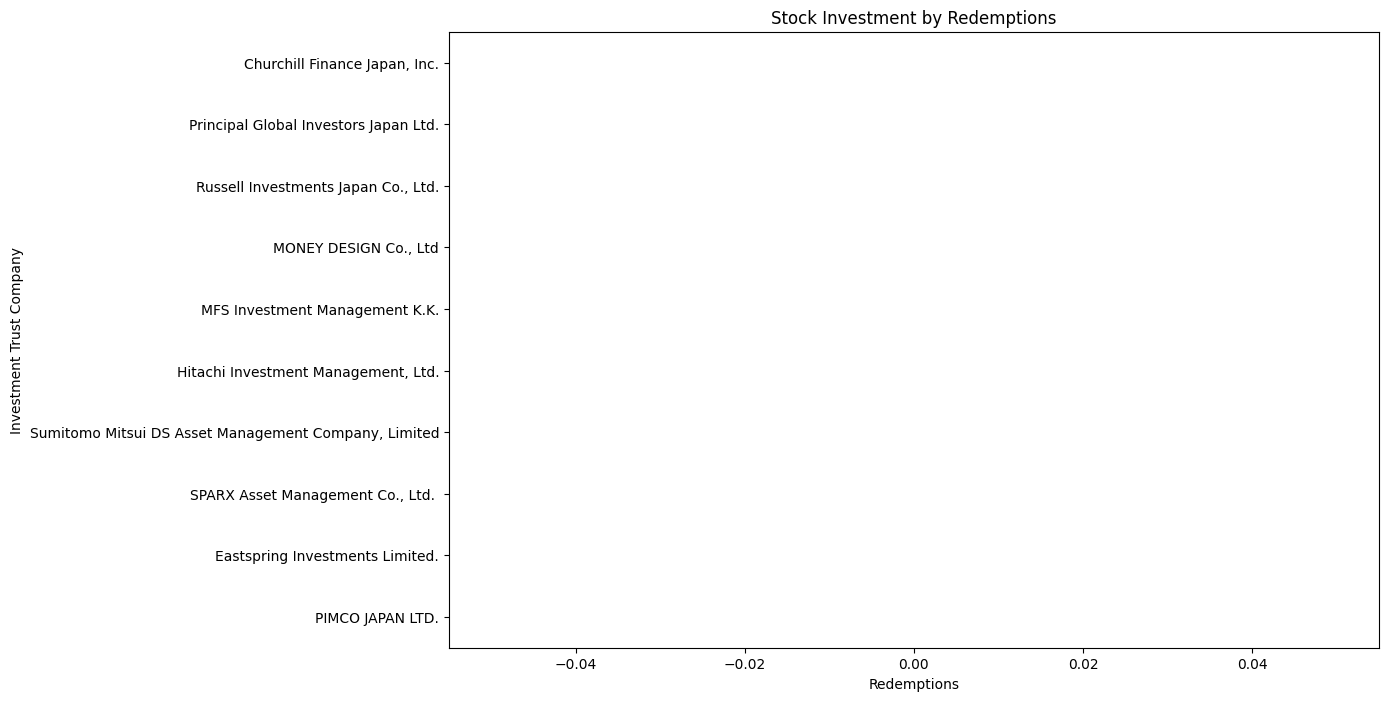

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


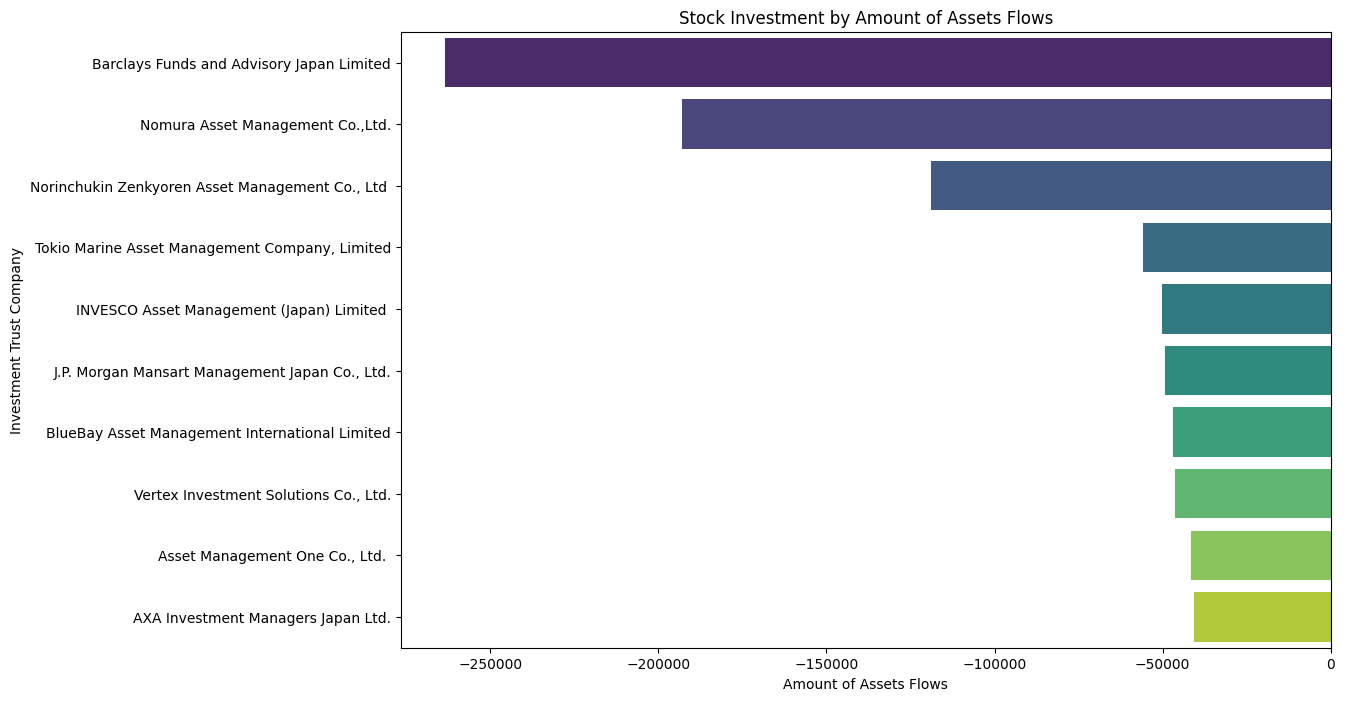

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


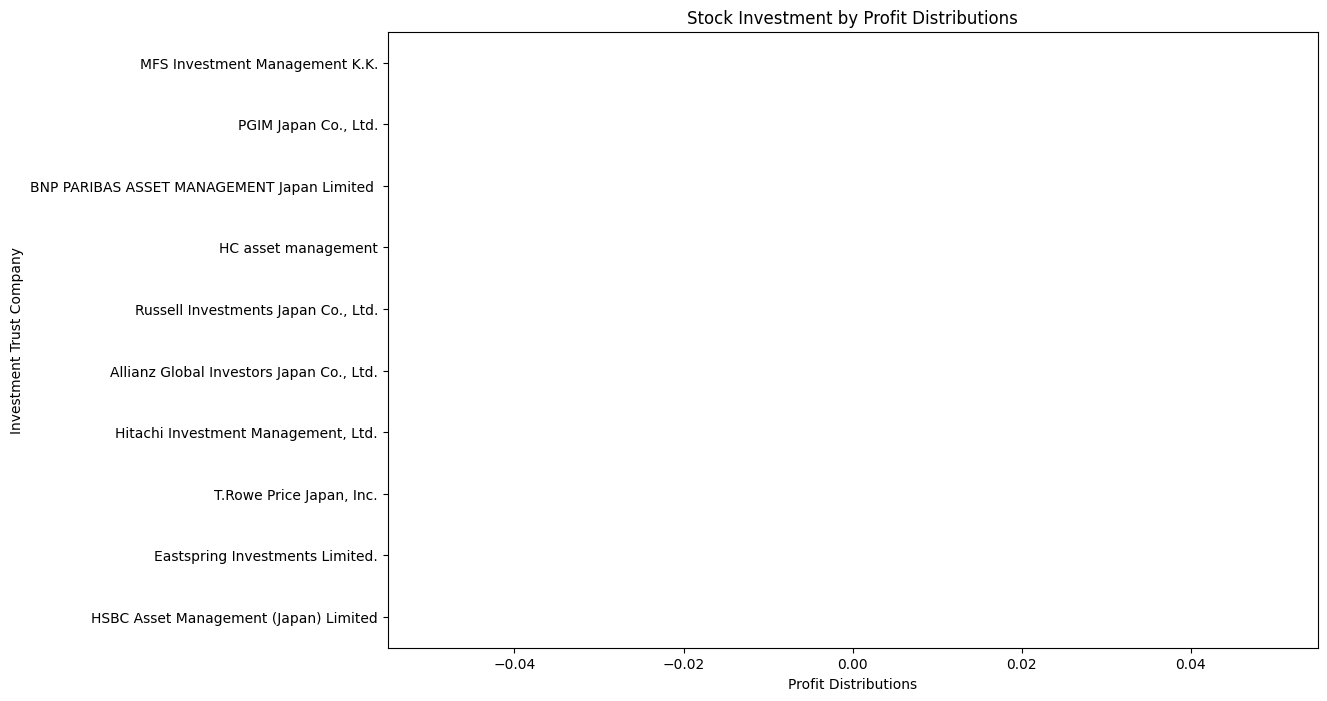

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


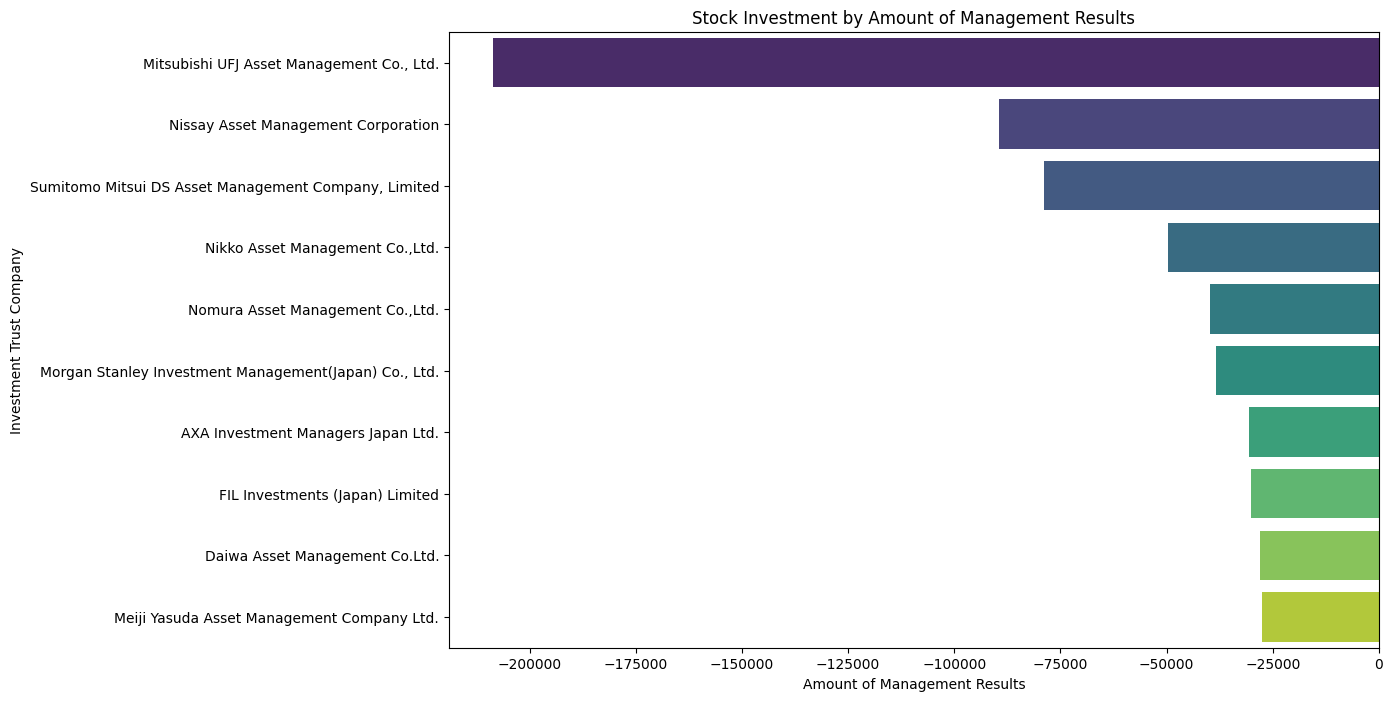

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


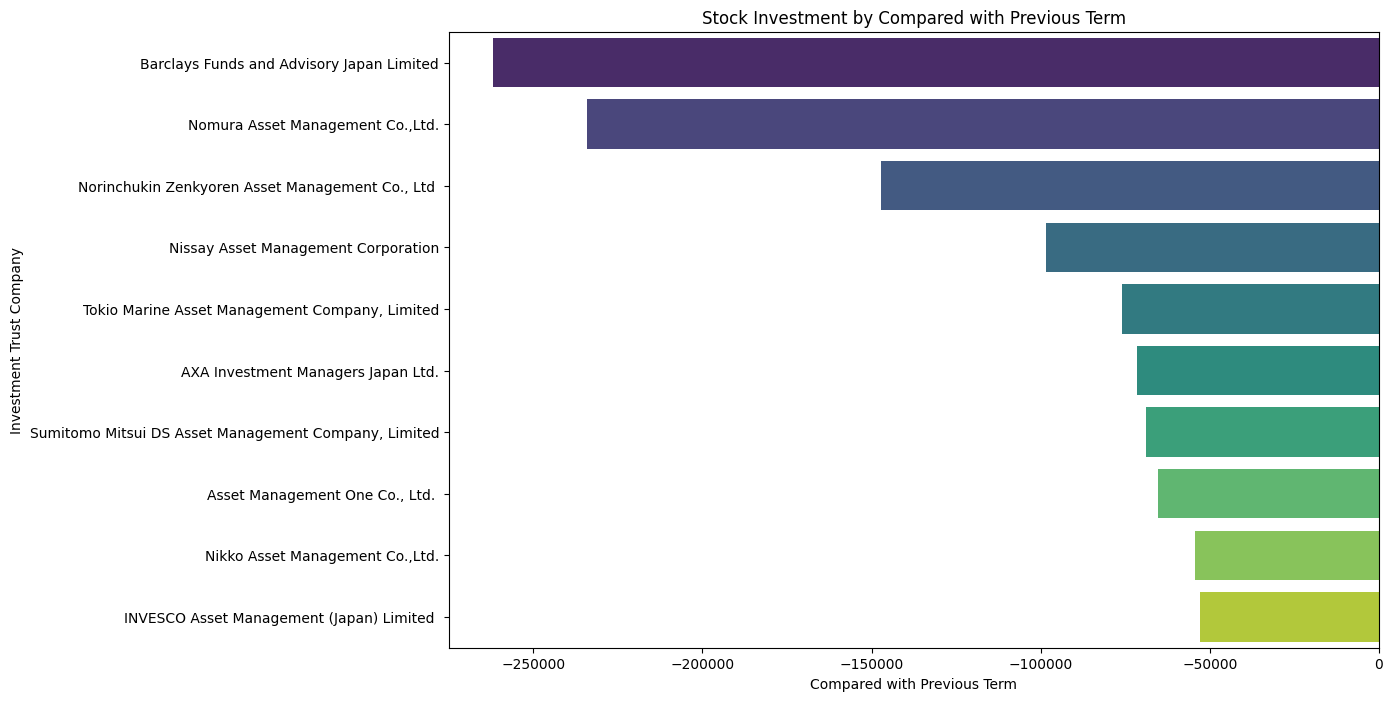

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


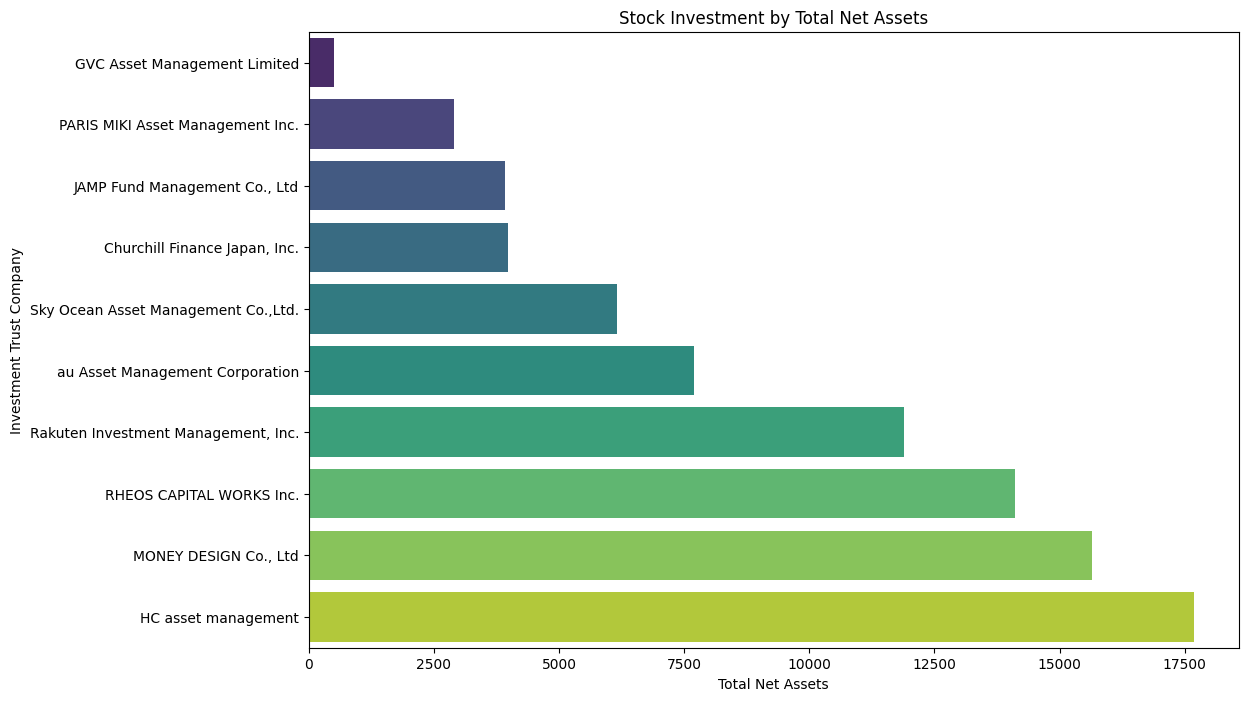

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


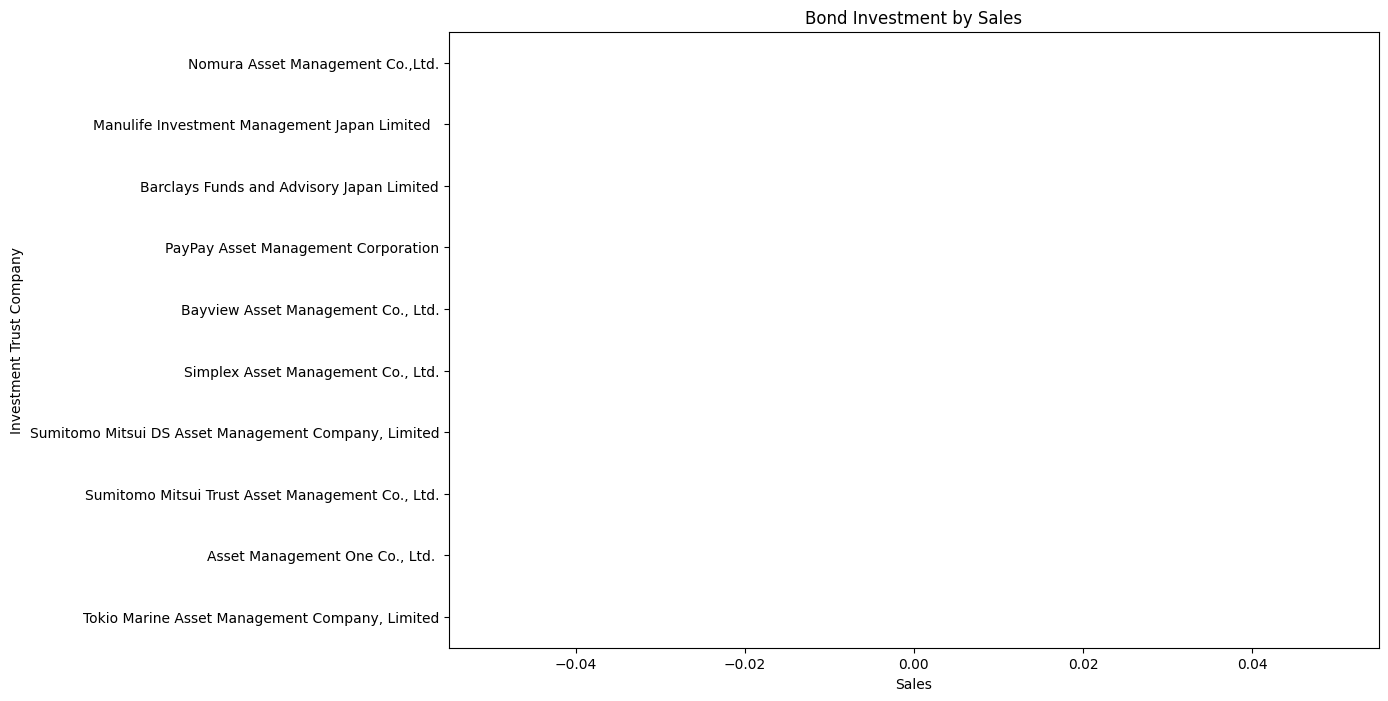

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


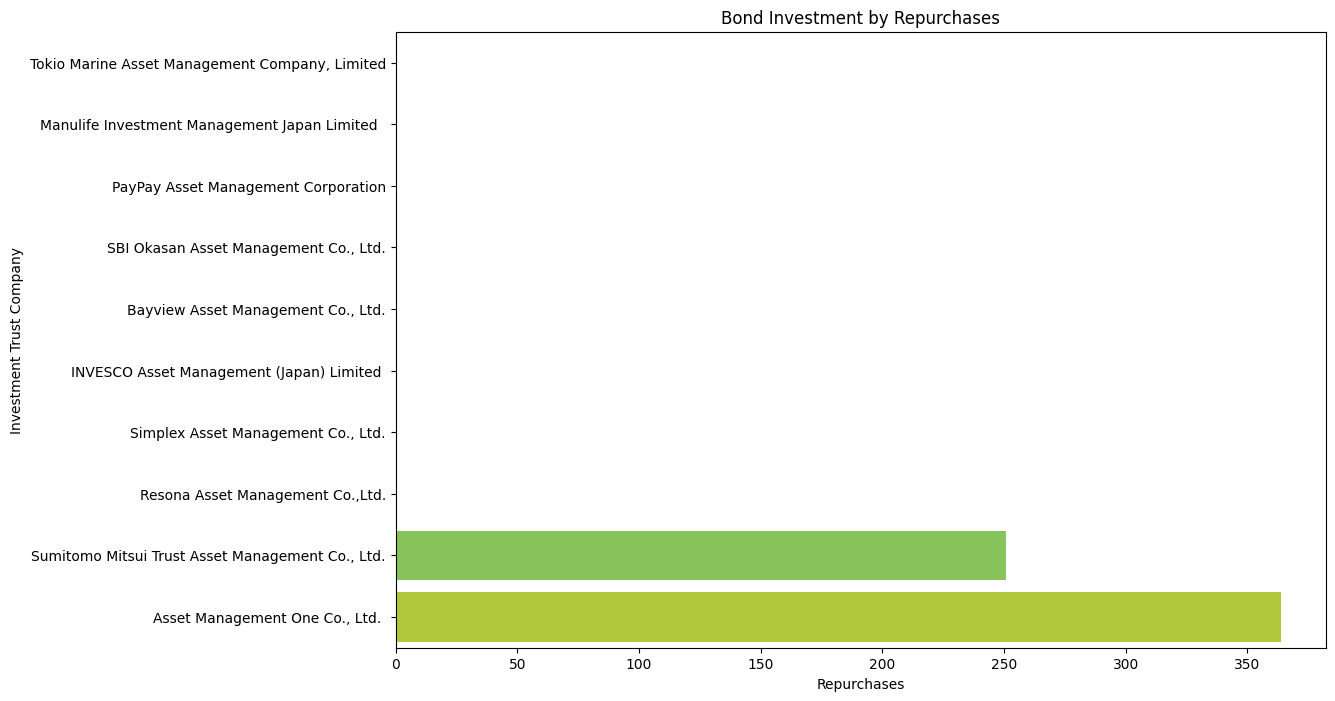

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


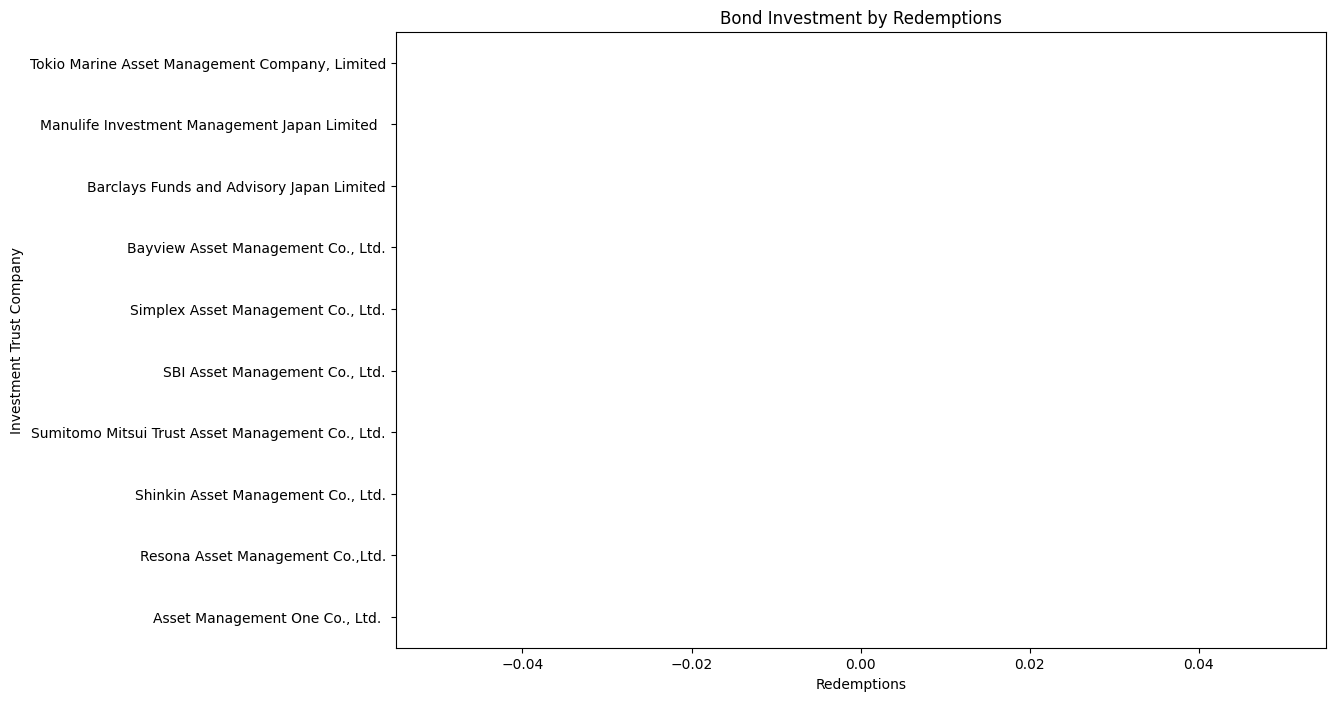

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


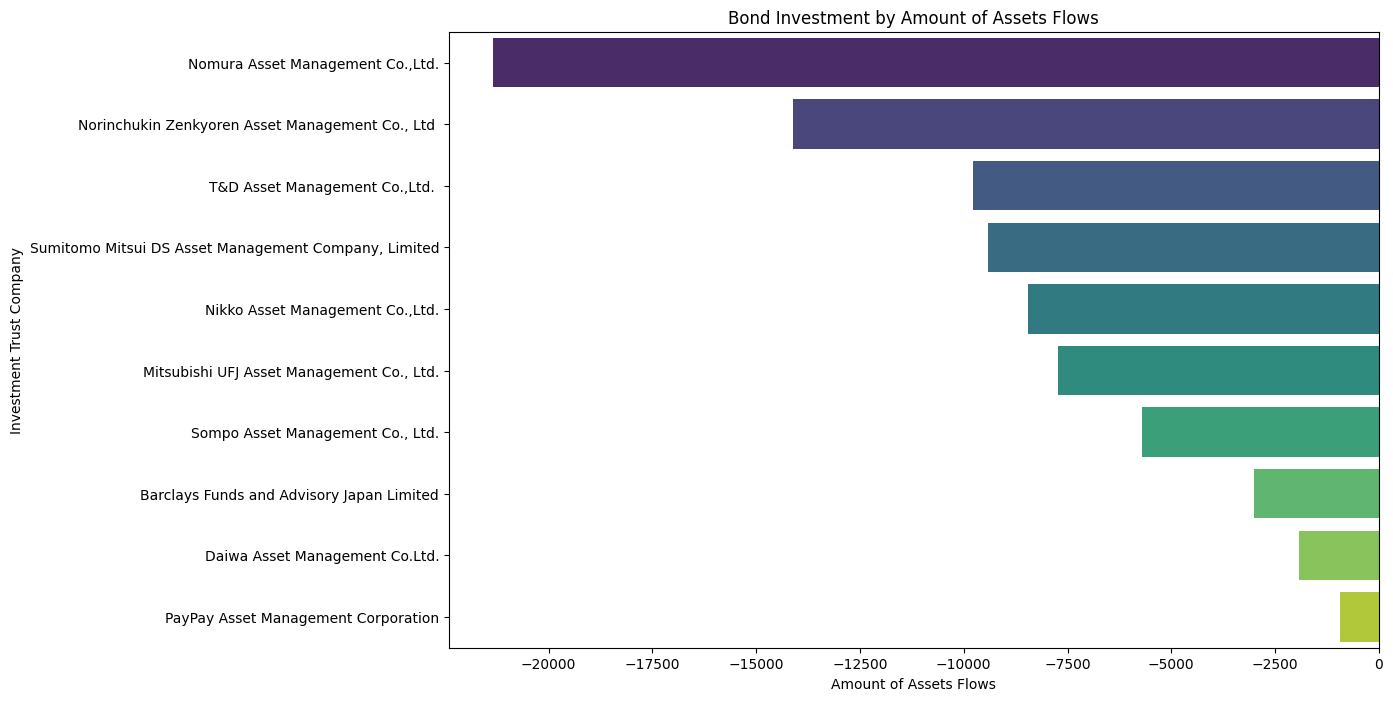

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


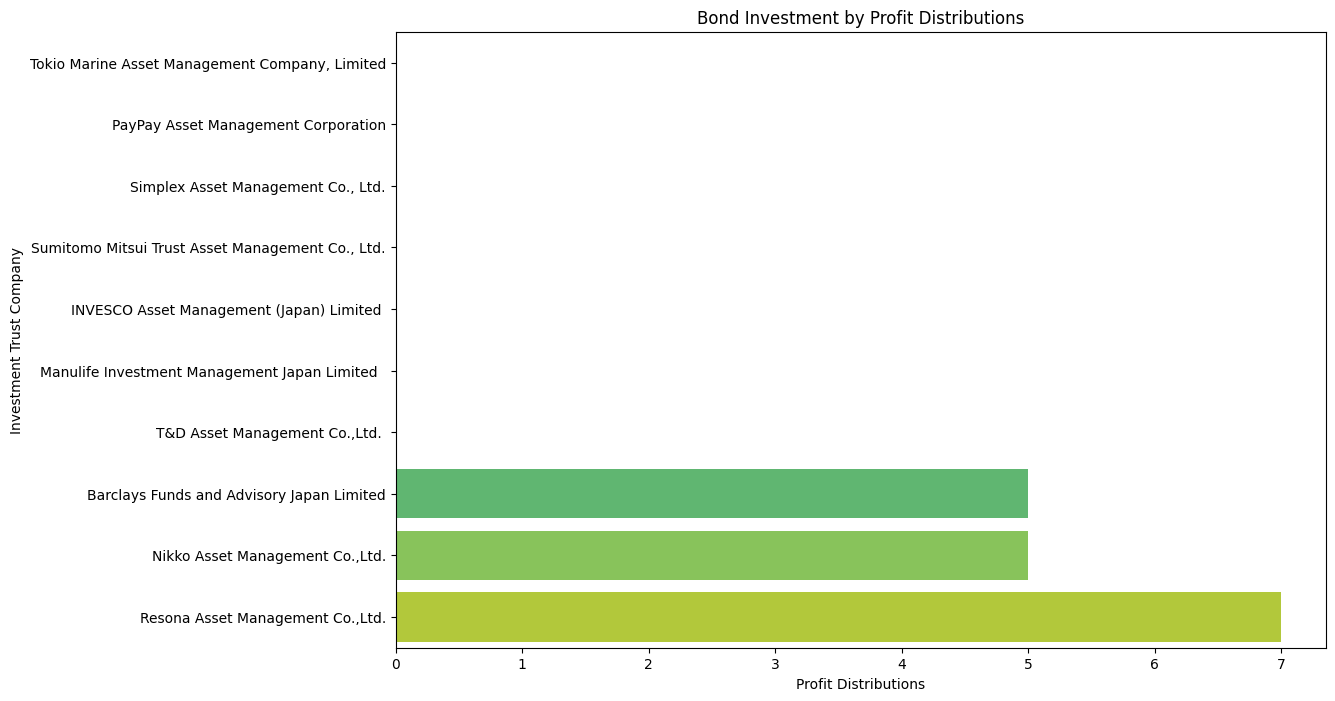

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


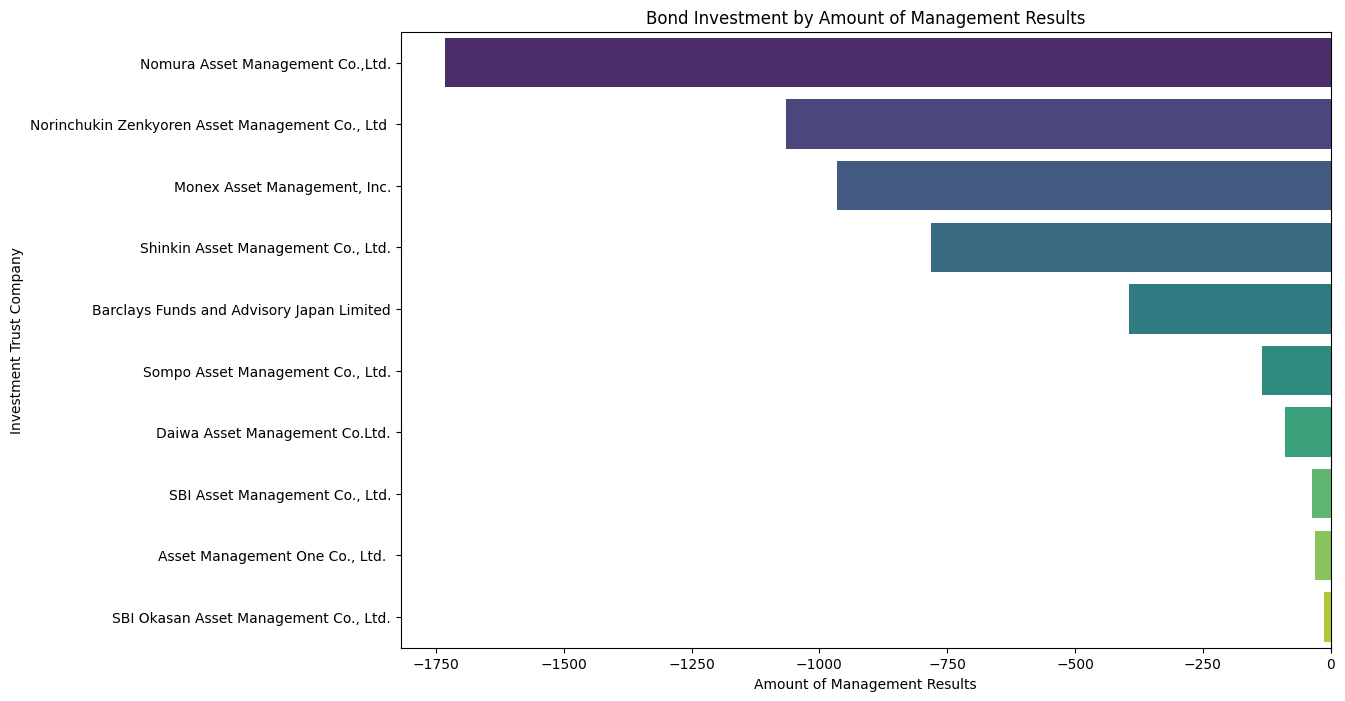

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


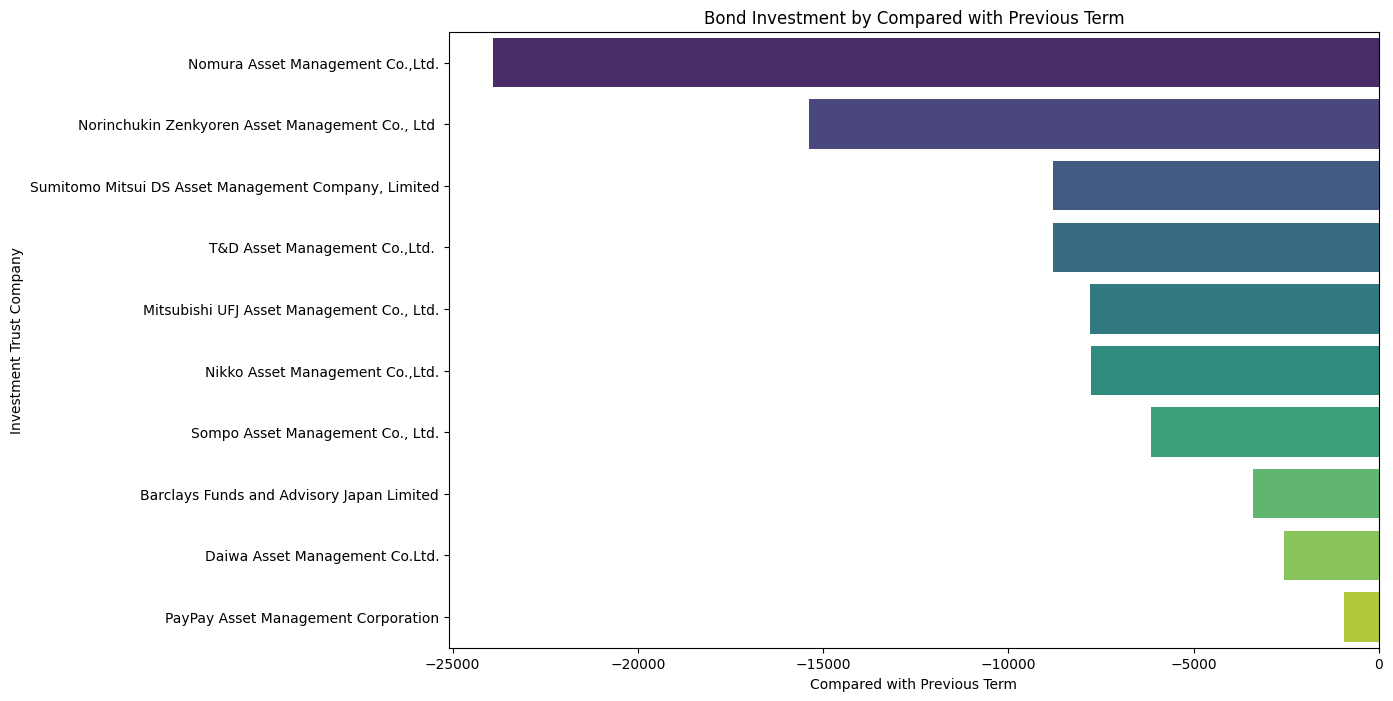

/tmp/ipykernel_4250/3776877471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')


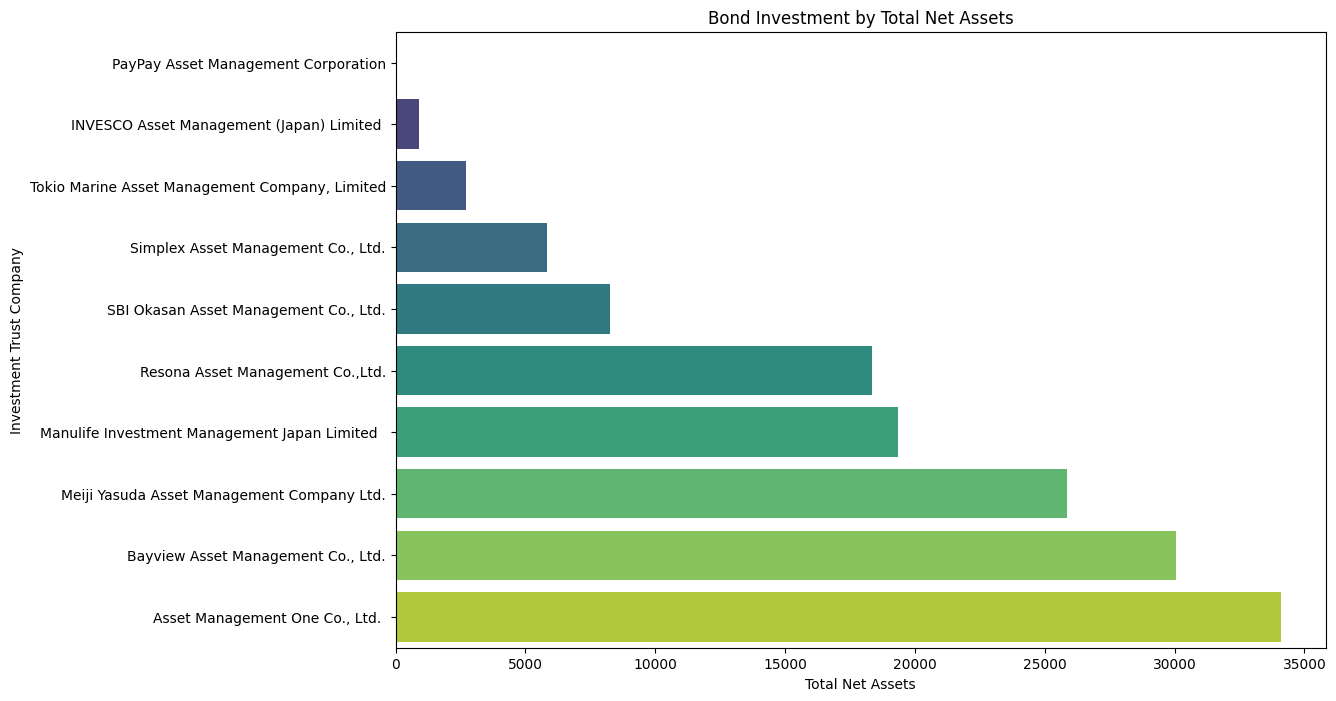

In [38]:
# illustrate data

for sheet in data:
    for column in english:
        plt.figure(figsize=(12, 8))
        df_descending = data[sheet].sort_values(by=[column], ascending=False)
        sns.barplot(x=column, y='english name', data=df_descending.head(10), palette='viridis')
        plt.title(f'{translation_dict[sheet]} by {column}')
        plt.xlabel(f'{column}')
        plt.ylabel('Investment Trust Company')
        plt.savefig(f"./private/{translation_dict[sheet]}/{column}")
        plt.show()
        plt.close()

for sheet in data:
    for column in english:
        plt.figure(figsize=(12, 8))
        df_ascending = data[sheet].sort_values(by=[column], ascending=True)
        sns.barplot(x=column, y='english name', data=df_ascending.head(10), palette='viridis')
        plt.title(f'{translation_dict[sheet]} by {column}')
        plt.xlabel(f'{column}')
        plt.ylabel('Investment Trust Company')
        plt.savefig(f"./private/{translation_dict[sheet]}/{column}")
        plt.show()
        plt.close()

